In [2]:
import os
import pandas as pd
import numpy as np


# Molecule parser

In [3]:
# Define the project folder name
import sys
from pathlib import Path
project_name = "Chapter_DNA_Modelling"

#a Get the current directory
current_path = Path().resolve()

# Traverse up the directory structure until the project folder is found
for parent in current_path.parents:
    if parent.name == project_name:
        project_root = parent
        break
else:
    raise FileNotFoundError(f"Project folder '{project_name}' not found in any parent directory.")

# Add the project src directory to sys.path
# sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/exploration',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages',
 '/Users/ivanyankov/Documents/Chapter_DNA_Modelling']

In [4]:
from src.parser.parser import Molecule

In [5]:
# Filter out key-value pairs where the value contains 'H'
# filtered_label_mapping = {k: v for k, v in label_mapping.items() if 'H' not in v}
filtered_label_mapping = {'C4*': 'C_sugar',
 'O1P': 'O_backbone',
 'C2*': 'C_sugar',
 'C5': 'C_nucleobase',
 'O6': 'O_nucleobase',
 'C6': 'C_nucleobase',
 'C2': 'C_nucleobase',
 'C5*': 'C_sugar',
 'C1*': 'C_sugar',
 'C5M': 'C_nucleobase',
 'O5*': 'O_sugar',
 'P': 'P_backbone',
 'O4*': 'O_sugar',
 'O2': 'O_nucleobase',
 'N3': 'N_nucleobase',
 'C3*': 'C_sugar',
 'N1': 'N_nucleobase',
 'N4': 'N_nucleobase',
 'N9': 'N_nucleobase',
 'C4': 'C_nucleobase',
 'N7': 'N_nucleobase',
 'O2P': 'O_backbone',
 'C': 'C_nucleobase',
 'N2': 'N_nucleobase',
 'N': 'N_nucleobase',
 'O3*': 'O_sugar',
 'O4': 'O_nucleobase',
 'C8': 'C_nucleobase',
 'N6': 'N_nucleobase',
 'O': 'O_nucleobase',
"C2'": 'C_sugar',
 "C4'": 'C_sugar',
 'H1': 'H_nucleobase',
 'H42': 'H_nucleobase',
 "H5''": 'H_sugar',
 'H3': 'H_nucleobase',
 "HO3'": 'H_sugar',
 "O4'": 'O_sugar',
'C7': 'C_nucleobase',
 'H73': 'H_nucleobase',
 "H2''": 'H_sugar',
 "HO5'": 'H_sugar',
 'H5': 'H_nucleobase',
 "H5'": 'H_sugar',
 'H41': 'H_nucleobase',
 'H21': 'H_nucleobase',
 'H2': 'H_nucleobase',
 "C5'": 'C_sugar',
 'H22': 'H_nucleobase',
 'H71': 'H_nucleobase',
 "H3'": 'H_sugar',
 'H8': 'H_nucleobase',
 'OP1': 'O_backbone',
 'H72': 'H_nucleobase',
 'H61': 'H_nucleobase',
 'OP2': 'O_backbone',
 "H1'": 'H_sugar',
 "C3'": 'C_sugar',
 "O5'": 'O_sugar',
 "C1'": 'C_sugar',
 'H6': 'H_nucleobase',
 "H4'": 'H_sugar',
 'H62': 'H_nucleobase',
 "H2'": 'H_sugar',
 "O3'": 'O_sugar',

 'H3*': 'H_sugar',
 'H2*2': 'H_sugar',
 'H2*1': 'H_sugar',
 'H5M3': 'H_nucleobase',
 'H5M2': 'H_nucleobase',
 'H5M1': 'H_nucleobase',
 'H5*1': 'H_sugar',
 'H5*2': 'H_sugar',
 'H1*': 'H_sugar',
 'H4': 'H_nucleobase',
 'H': 'H_nucleobase',
 'H4*': 'H_sugar'}

In [6]:
# test = Molecule('30_cm.cml', mapping=filtered_label_mapping)


In [7]:
# test.unique_atom_labels
# test.mapping.values()


In [8]:
# test.count_occurrences(cutoff_distance=12)

# Move to next notebookfor ML,LZ and MH experiments

In [9]:
df_lz=pd.read_csv(project_root/'data/processed/Experiment_lz.csv')
df_lz
df_lz = df_lz[['Tm','DNA']]
df_lz

,Tm,DNA
0,16.9,aaaaaaaa
1,27.9,aaaaaaaaa
2,32.0,aaaaaaaaaa
3,35.7,aactggac
4,37.0,aagcgtag
...,...,...
300,28.7,ttcattcc
301,32.9,ttctggac
302,69.2,ttgaagatacgctggc
303,35.8,ttgtggac


In [10]:
project_root

PosixPath('/Users/ivanyankov/Documents/Chapter_DNA_Modelling')

In [11]:
df_mh = pd.read_csv('df_eda_updated_pH_no_Mg_Ion.csv')
df_mh.shape

(78, 46)

# Data loading, fillingin nans, and selecting label informaiton

In [12]:
df_mh = df_mh[['Tm','Avogadro_file_name']]
df_mh = df_mh.dropna().reset_index(drop=True)
df_mh

,Tm,Avogadro_file_name
0,25.85,gagggaCagaaagctccctCtctttc.cml
1,64.14,tacaggtccatgggatctga.cml
2,49.23,gagggacagaaag.cml
3,53.37,tttgtttgtttgattgtttttttttt.cml
4,44.88,gagggtatgaaag.cml
...,...,...
64,39.10,aaaaaaaaaataattttaaatattt.cml
65,53.29,69_t26_gxttg_imi-quin_imi-quin.cml
66,28.97,84_1_3DA_t.cml
67,20.83,98_C-Im_C-Im.cml


In [13]:
df_mh.columns

Index(['Tm', 'Avogadro_file_name'], dtype='object')

In [14]:
df_mh = pd.read_csv('df_eda_updated_pH_no_Mg_Ion.csv')
df_mh.shape

(78, 46)

In [15]:
df_type = df_mh[['Tm','Avogadro_file_name','type','Consensuc sequence','Nucleotide shorthand','pH']]
df_type = df_mh[['Tm','Avogadro_file_name','type','Consensuc sequence','Nucleotide shorthand','pH','w3DNA','DNA_conv1']]
df_type = df_type.dropna(subset=['Avogadro_file_name']).reset_index(drop=True)
df_type.shape
df_type

nan_positions = df_type.isna()
columns_with_nan = df_type.isna().any()
columns_with_nan
nan_locations = df_type[df_type.isna().any(axis=1)]
nan_locations
df_type=df_type.fillna(6.8)
df_type

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1
0,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8,gagggacagaaag,gagggacagaaag
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag
...,...,...,...,...,...,...,...,...
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt
65,53.29,69_t26_gxttg_imi-quin_imi-quin.cml,chemically_modified,tttgtttgtStgSSSgtStttttttt,X=imi-quin,6.8,tttgtttgtttgtttgtttttttttt,tttgtttgtttgxttgtttttttttt
66,28.97,84_1_3DA_t.cml,chemically_modified,gagggSSSgaaag,X = 1_3DA,6.8,gagggaaagaaag,gagggaxagaaag
67,20.83,98_C-Im_C-Im.cml,chemically_modified,gagggSSSgaaag,X = C-Im,6.8,gagggtatgaaag,gagggtxtgaaag


Consider plotting based on the w3DNA template the Tm against some chemical features of chemically modified strucutres.color them by chemical modificaitons

# Comput Features
because chemically modified structures have a terminal PO2 group the features will be calculated suing avogardo and w3DNA files witohut tleap chopped off PO2 residues.

Ceck if descriptor set has hydrogens (in the dicitonary)

there are,either drop them or simply use H_tleap,as it hase the PO@ grous (failed)

maybe reduce the structure using openbabel


## Count occurances and length

In [16]:
def add_sequence_features(df, sequence_column):
    # Function to calculate features
    def calculate_features(sequence):
        length = len(sequence)
        count_g = sequence.count('g')
        count_a = sequence.count('a')
        count_c = sequence.count('c')
        count_t = sequence.count('t')
        count_x = sequence.count('x')
        count_y = sequence.count('y')
        
        return pd.Series({
            'Length': length,
            'Count_G': count_g,
            'Count_A': count_a,
            'Count_C': count_c,
            'Count_T': count_t,
            'Count_X': count_x,
            'Count_Y': count_y
        })
    
    # Apply the feature calculation function to each row of the DataFrame
    features_df = df[sequence_column].apply(calculate_features)
    
    # Concatenate the new features with the original DataFrame
    df = pd.concat([df, features_df], axis=1)
    
    return df

In [17]:
df_mh_with_features = add_sequence_features(df_type, 'DNA_conv1')
df_mh_with_features
df_lz_with_features = add_sequence_features(df_lz, 'DNA')
df_lz_with_features

,Tm,DNA,Length,Count_G,Count_A,Count_C,Count_T,Count_X,Count_Y
0,16.9,aaaaaaaa,8,0,8,0,0,0,0
1,27.9,aaaaaaaaa,9,0,9,0,0,0,0
2,32.0,aaaaaaaaaa,10,0,10,0,0,0,0
3,35.7,aactggac,8,2,3,2,1,0,0
4,37.0,aagcgtag,8,3,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...
300,28.7,ttcattcc,8,0,1,3,4,0,0
301,32.9,ttctggac,8,2,1,2,3,0,0
302,69.2,ttgaagatacgctggc,16,5,4,3,4,0,0
303,35.8,ttgtggac,8,3,1,1,3,0,0


In [18]:
import matplotlib.pyplot as plt
plt.style.use('default')

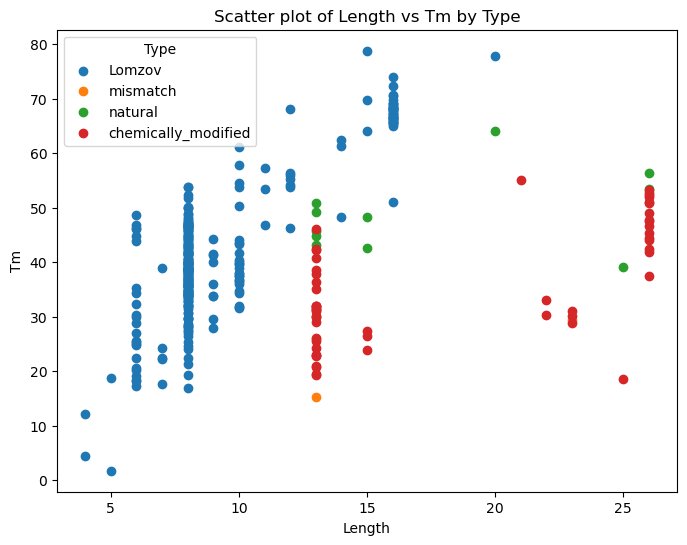

In [19]:

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.scatter(df_lz_with_features['Length'],df_lz_with_features['Tm'],label='Lomzov')
# Loop through each unique value in the 'type' column
for category in df_mh_with_features['type'].unique():
    # Filter the DataFrame based on the current category
    subset = df_mh_with_features[df_mh_with_features['type'] == category]
    
    # Plot the scatter plot for the current category
    plt.scatter(subset['Length'], subset['Tm'], label=category)
    

# Add labels, title, and legend
plt.xlabel('Length')
plt.ylabel('Tm')
plt.title('Scatter plot of Length vs Tm by Type')
plt.legend(title='Type')
plt.savefig('Chemically_modified_shift_to_natural_DNA.png')
plt.show()


We see that the natural bases are at lower Tm values compared those in the lomzov dataset. This could be dure to experimental mesurements conditions and or calculation of the Tm (unlikely). Nevertheless, if they are part of the same trend then we beign to see that natural DNA strand span much greater lengths.of Tm in each categorty of DNA strand length. Also the longer chains could be reaching a region where the linear trend is changing.

in another case where they are shifted due to any of the above mentioned conditioins, it might be worth calibrating the datasets or training models with weighted samples from the HB dataset. 


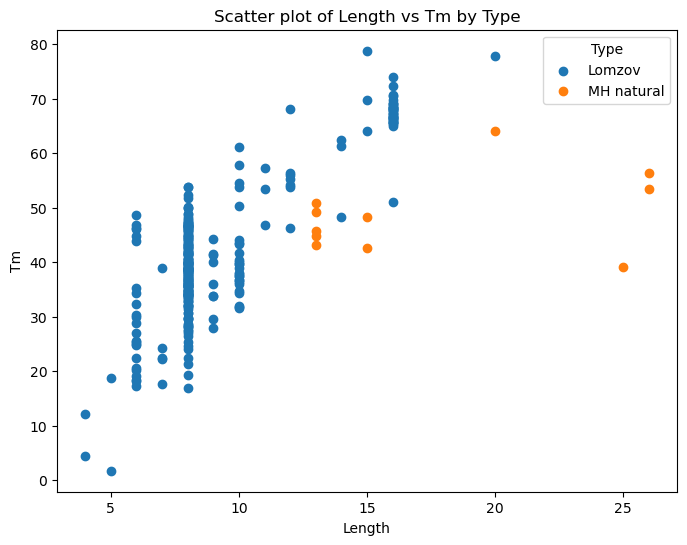

In [20]:

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.scatter(df_lz_with_features['Length'],df_lz_with_features['Tm'],label='Lomzov')
# Loop through each unique value in the 'type' column
for category in df_mh_with_features['type'].unique():
    # Filter the DataFrame based on the current category
    if category == 'natural':
        subset = df_mh_with_features[df_mh_with_features['type'] == category]
        
        # Plot the scatter plot for the current category
        plt.scatter(subset['Length'], subset['Tm'], label='MH natural')
    

# Add labels, title, and legend
plt.xlabel('Length')
plt.ylabel('Tm')
plt.title('Scatter plot of Length vs Tm by Type')
plt.legend(title='Type')
plt.savefig('Natural_DNA_Lomzov_Marian.png')
plt.show()

In [21]:
def plot_distributions(df1, df2, descriptors,dataset_name1='Lomzov 305',dataset_name2='Hebenbrock 12',title='Naturally occuring DNA duplexes - Overlap Lomzov and Hebenbrock datasets.png'):
    fig, axes = plt.subplots(len(descriptors), 2, figsize=(10, 5 * len(descriptors)))
    dataset_name2 = f'Hebenbrock {len(df2)}'
    for i, descriptor in enumerate(descriptors):
        # Histogram
        bins = np.arange(0, 31, 1)
        sns.histplot(df1[descriptor], bins=bins, kde=True, color='blue', ax=axes[i, 0], label=dataset_name1, alpha=0.5, stat='density')
        sns.histplot(df2[descriptor], bins=bins, kde=True, color='red', ax=axes[i, 0], label=dataset_name2, alpha=0.5, stat='density')
        axes[i, 0].legend()
        axes[i, 0].set_title(f'Histogram of {descriptor}')
        
        # KDE plotaa
        sns.kdeplot(df1[descriptor], ax=axes[i, 1], label=dataset_name1, color='blue', clip=(0, None))
        sns.kdeplot(df2[descriptor], ax=axes[i, 1], label=dataset_name2, color='red', clip=(0, None))
        axes[i, 1].legend()
        axes[i, 1].set_title(f'KDE of {descriptor}')
    
    plt.tight_layout()
    plt.savefig(f'{title}')
    plt.show()

In [22]:
import seaborn as sns

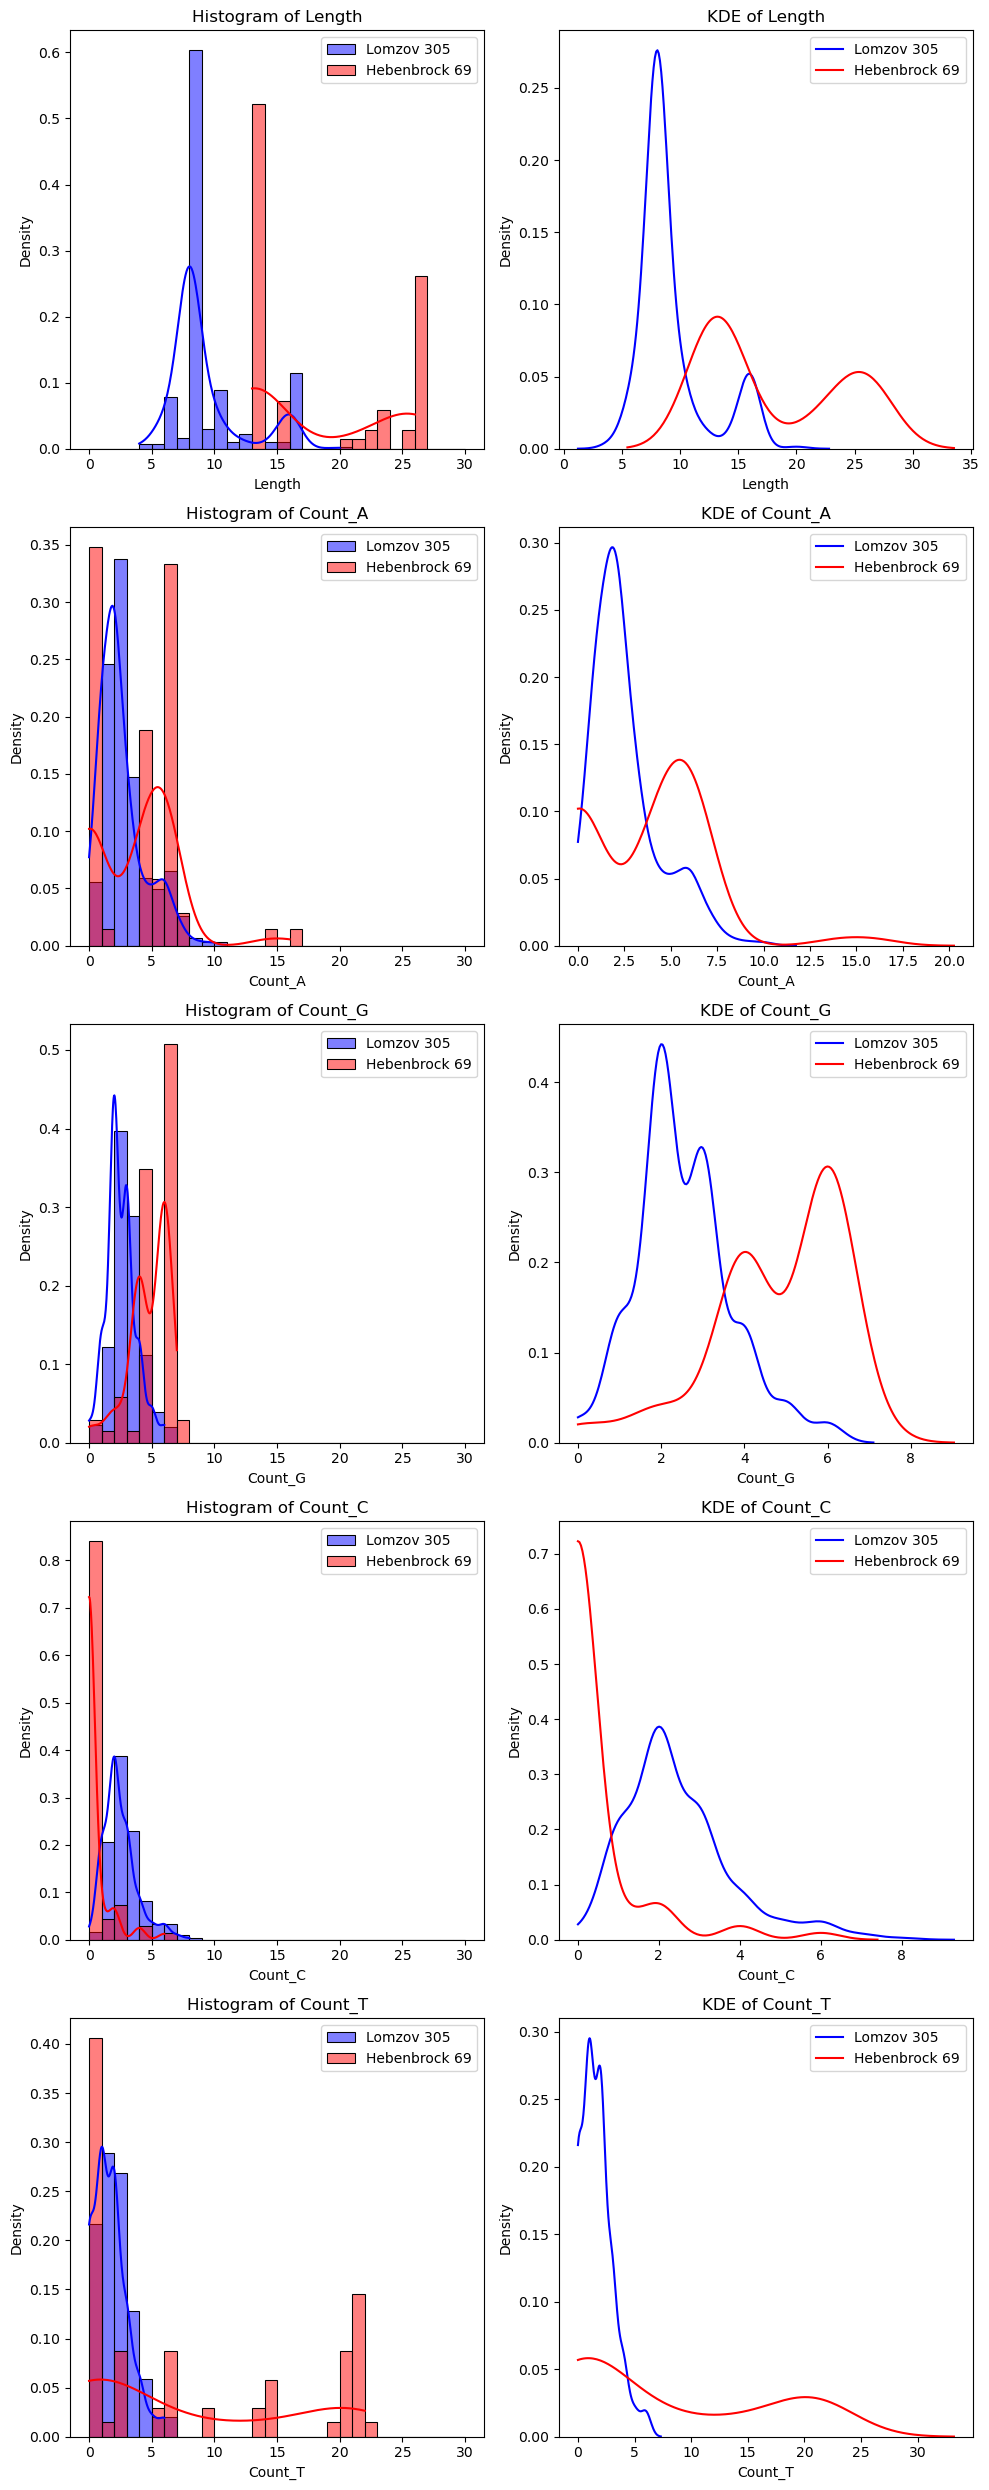

In [23]:
common_descriptors = ['Length', 'Count_A', 'Count_G', 'Count_C', 'Count_T']
plot_distributions(df_lz_with_features, df_mh_with_features, common_descriptors,dataset_name2='Hebenbrock 69',title='KDE_lz_MH_all.png')

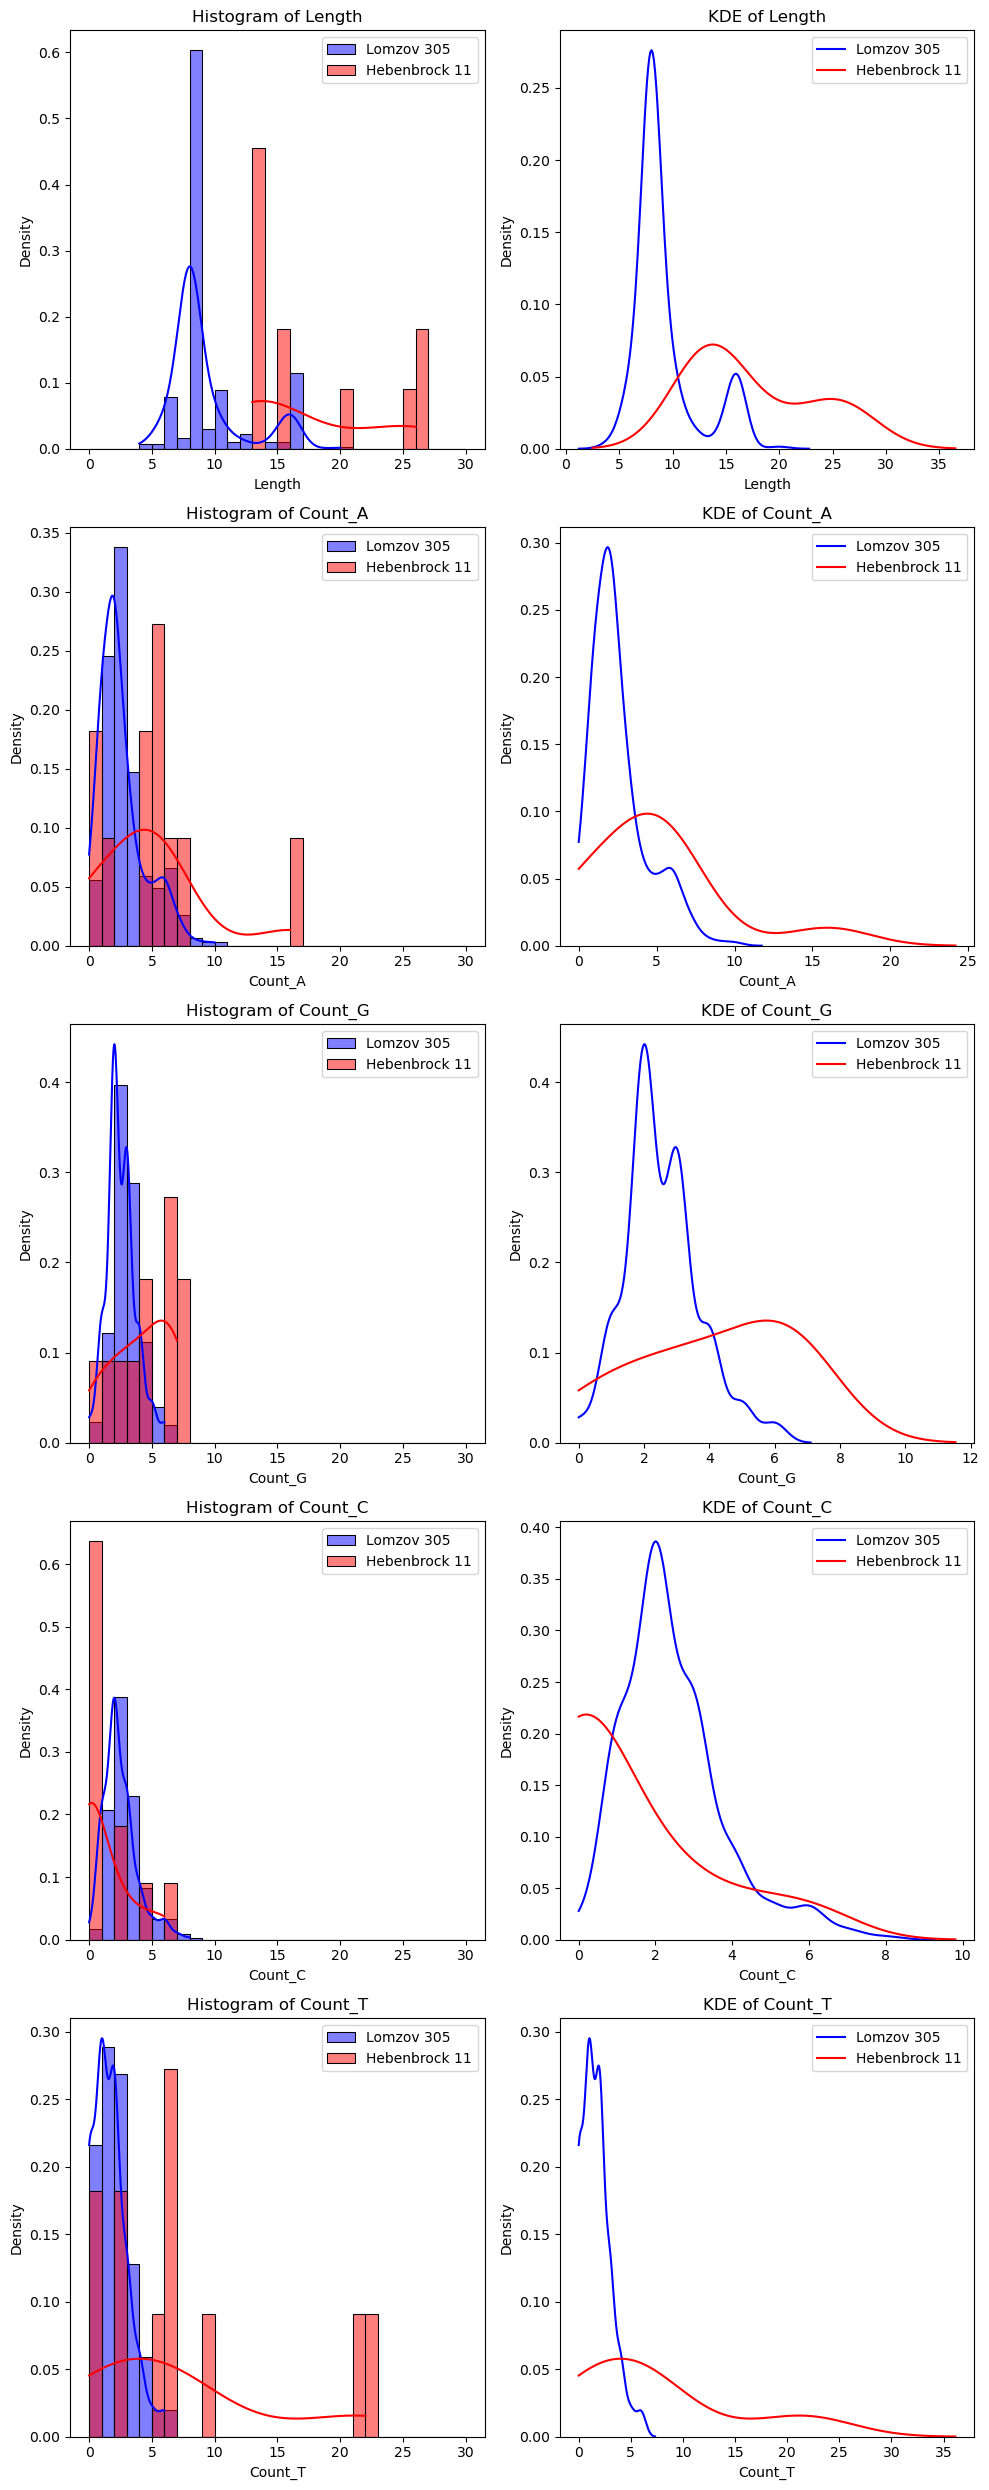

In [24]:
common_descriptors = ['Length', 'Count_A', 'Count_G', 'Count_C', 'Count_T']
plot_distributions(df_lz_with_features, df_mh_with_features[df_mh_with_features['type'] == 'natural'], common_descriptors,
                   dataset_name2='Hebenbrock 11',title='KDE_lz_MH_natural.png')

# plot_distributions(df_lz_with_features, df_mh_with_features, common_descriptors,dataset_name2='Hebenbrock 69',title='KDE_lz_MH_all.png')

## DNA Score

In [25]:
df_mh_with_features

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1,Length,Count_G,Count_A,Count_C,Count_T,Count_X,Count_Y
0,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8,gagggacagaaag,gagggacagaaag,13,6,6,1,0,0,0
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga,20,6,5,4,5,0,0
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc,13,1,0,6,6,0,0
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt,26,4,1,0,21,0,0
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag,13,6,5,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt,25,0,16,0,9,0,0
65,53.29,69_t26_gxttg_imi-quin_imi-quin.cml,chemically_modified,tttgtttgtStgSSSgtStttttttt,X=imi-quin,6.8,tttgtttgtttgtttgtttttttttt,tttgtttgtttgxttgtttttttttt,26,4,0,0,21,1,0
66,28.97,84_1_3DA_t.cml,chemically_modified,gagggSSSgaaag,X = 1_3DA,6.8,gagggaaagaaag,gagggaxagaaag,13,6,6,0,0,1,0
67,20.83,98_C-Im_C-Im.cml,chemically_modified,gagggSSSgaaag,X = C-Im,6.8,gagggtatgaaag,gagggtxtgaaag,13,6,4,0,2,1,0


In [26]:
project_root/'data/processed/'

PosixPath('/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed')

In [27]:
# test.count_occurrences(atoms = ['C', 'N', 'O', 'O1-', 'P'],cutoff_distance=12)

cwd = project_root/'data/processed/'
# Directory paths
chemically_modified_dir = f'{cwd}/All/cml_chemicallymodified/'
natural_dir = f'{cwd}/All/cml_w3DNA_natural/'
mismatch_dir = f'{cwd}/All/cml_w3DNA_mismatch/'


rows=[]
files=[]
# Initialize an empty DataFrame to store all results
df_desc = pd.DataFrame()


# Loop over each cutoff distance
for file in df_mh_with_features['Avogadro_file_name']:
    # Call the count_occurrences method with the current cutoff distance

     # Check if the file exists in the chemically modified directory
    file_path = os.path.join(chemically_modified_dir, file)
    
    if not os.path.exists(file_path):
        # If not found, check the natural directory
        file_path = os.path.join(natural_dir, file)
        if not os.path.exists(file_path):
            # If not found, check the natural directory
            file_path = os.path.join(mismatch_dir, file)
            
            

        
    if os.path.exists(file_path):
        # Call the Molecule function with the file path
        test = Molecule(file_path, mapping=filtered_label_mapping)
        # Process 'test' as needed


    # test = Molecule(f'{file}', mapping=filtered_label_mapping)

        occurrence_counts = test.count_occurrences(cutoff_distance=12, crit=None)
        # occurrence_counts = test.count_occurrences(cutoff_distance=12)

        # Convert the dictionary to a list of counts
        counts = list(occurrence_counts.values())

        # Add the current cutoff distance as the last column

        # Store the row as a DataFrame in the list
        row_df = pd.DataFrame([counts])
        rows.append(row_df)
        files.append(file)
    else:
        print(f"File {file} not found in either directory.")

# Concatenate all rows into a single DataFrame
df_desc = pd.concat(rows, ignore_index=True)


# Define column names from the atom pairs and add "Cutoff Distance" as the last column
columns = [f'{pair[0]}-{pair[1]}' for pair in occurrence_counts.keys()]


# # Assign the column names to the DataFrame
df_desc.columns = columns
# df_desc = pd.concat([df_desc,pd.Series(files)],axis=1,ignore_index=True)
df_desc
# df=pd.concat([df,df_desc],axis=1)
# df


,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,C_sugar-H_sugar,O_backbone-C_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,677,44,975,432,359,50,712,750,820,44,...,1280,834,102,1256,534,483,79,914,1021,1132
1,1122,74,1881,470,603,86,1639,1390,1372,72,...,1916,1374,169,2466,588,795,135,2149,1865,1874
2,677,44,1014,433,359,50,759,768,820,44,...,1280,834,102,1312,539,483,79,973,1043,1132
3,1530,104,2811,154,807,119,2660,2010,1851,106,...,2282,1861,240,3694,190,1064,182,3513,2686,2505
4,678,43,1043,356,362,49,824,794,827,43,...,1262,828,99,1358,444,484,79,1072,1072,1144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1480,104,2342,772,780,115,1720,1667,1794,102,...,2464,1790,229,3102,967,1027,175,2260,2285,2409
65,1193,78,2690,184,625,102,2383,1967,1449,79,...,2223,1449,177,3526,246,825,158,3149,2628,1958
66,488,31,717,327,257,34,518,556,588,31,...,1688,599,71,931,406,348,55,665,763,821
67,344,18,843,357,177,34,550,688,409,17,...,1152,422,40,1074,464,242,55,710,923,580


# Start of Radial Distribution exploration

In [29]:
df_mh_with_features['Avogadro_file_name'][0]

'gagggaCagaaagctccctCtctttc.cml'

In [36]:
# test.count_occurrences(atoms = ['C', 'N', 'O', 'O1-', 'P'],cutoff_distance=12)

cwd = project_root/'data/processed/'
# Directory paths
chemically_modified_dir = f'{cwd}/All/cml_chemicallymodified/'
natural_dir = f'{cwd}/All/cml_w3DNA_natural/'
mismatch_dir = f'{cwd}/All/cml_w3DNA_mismatch/'


rows=[]
files=[]
# Initialize an empty DataFrame to store all results
df_desc = pd.DataFrame()


# Loop over each cutoff distance
# for file in df_mh_with_features['Avogadro_file_name']:
    # Call the count_occurrences method with the current cutoff distance

    # Check if the file exists in the chemically modified directory

file = df_mh_with_features['Avogadro_file_name'][0]
file_path = os.path.join(chemically_modified_dir, file)

if not os.path.exists(file_path):
    # If not found, check the natural directory
    file_path = os.path.join(natural_dir, file)
    if not os.path.exists(file_path):
        # If not found, check the natural directory
        file_path = os.path.join(mismatch_dir, file)
        
        

    
if os.path.exists(file_path):
    # Call the Molecule function with the file path
            # Assuming the function Molecule and filtered_label_mapping are already defined
    test = Molecule(file_path, mapping=filtered_label_mapping)

    # Initialize lists to store data
    rows = []
    files = []

    # Define the range of cutoff distances from 0.5 to 15
    cutoff_distances = np.arange(0.5, 50.5, 0.2)

    for cutoff_distance in cutoff_distances:
        # Get occurrence counts within the current cutoff distance
        occurrence_counts = test.count_occurrences(cutoff_distance=cutoff_distance, crit=None)
        
        # Convert the dictionary to a list of counts
        counts = list(occurrence_counts.values())

        # Compute the spherical volume for the current cutoff radius
        spherical_volume = (4/3) * np.pi * (cutoff_distance ** 3)
        
        # Normalize the occurrence counts by the spherical volume
        normalized_counts = [count / spherical_volume for count in counts]
        
        # Add the current cutoff distance to the list of normalized counts
        normalized_counts.append(cutoff_distance)
        
        # Store the row as a DataFrame in the list
        row_df = pd.DataFrame([normalized_counts])
        rows.append(row_df)
        files.append(file)

    # Concatenate all rows into a single DataFrame
    final_df = pd.concat(rows, ignore_index=True)

In [54]:
final_df.shape
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3


(8.0, 20.0)

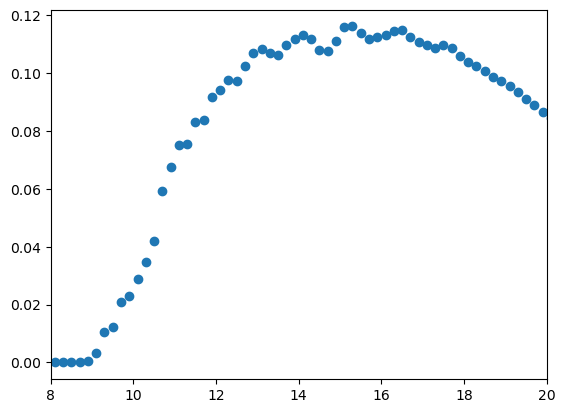

In [40]:
plt.scatter(final_df.index*0.2+0.5,final_df[[0]])
plt.xlim(8,20)

<AxesSubplot:>

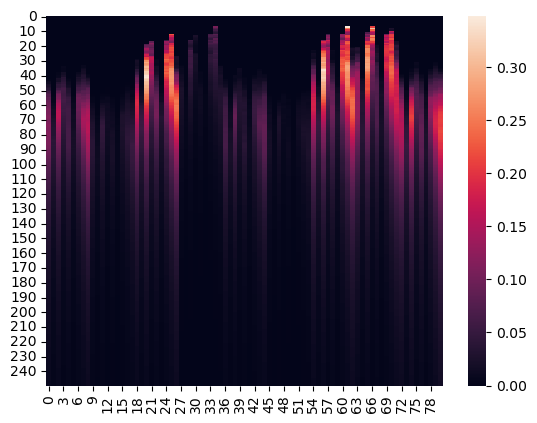

In [55]:
sns.heatmap(final_df[final_df.columns[:-1]])

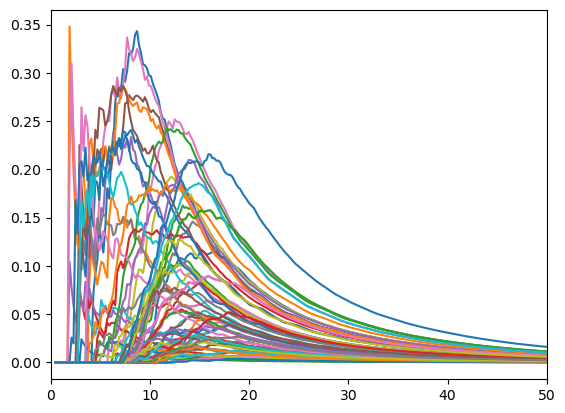

In [52]:
for i in range(len(final_df.columns[:-1])):
    plt.plot(final_df.index*0.2+0.5,final_df[final_df.columns[i]])
    plt.xlim(0,50)

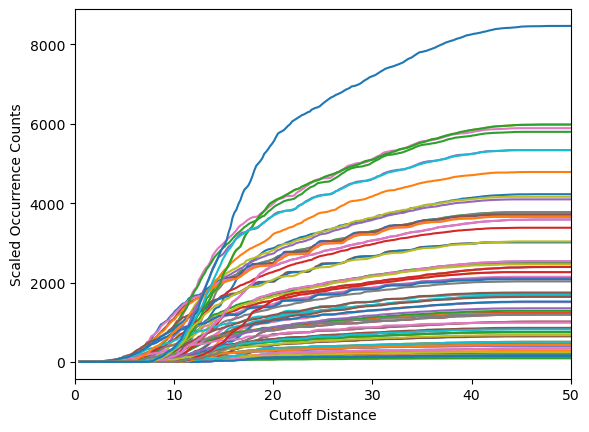

In [58]:
# Iterate over the columns (except the last one, which contains the radius)
for i in range(len(final_df.columns[:-1])):
    # Get the corresponding radius from the last column
    radii = final_df[final_df.columns[-1]]
    
    # Compute the spherical volume for each radius
    spherical_volumes = (4/3) * np.pi * (radii ** 3)
    
    # Scale the y-values (final_df[final_df.columns[i]]) with the spherical volumes
    scaled_y_values = final_df[final_df.columns[i]] * spherical_volumes
    
    # Plot the scaled y-values
    plt.plot(final_df.index * 0.2 + 0.5, scaled_y_values, label=f'Feature {i+1}')
    
# Set x-axis limit and labels
plt.xlim(0, 50)
plt.xlabel('Cutoff Distance')
plt.ylabel('Scaled Occurrence Counts')
# plt.legend()
plt.show()

# End of Radial Distribution break

In [113]:
df_reset=df_mh_with_features.reset_index(drop=True)

df_temp=pd.concat([df_reset,df_desc],axis=1)#
df_temp

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1,Length,Count_G,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8,gagggacagaaag,gagggacagaaag,13,6,...,1280,834,102,1256,534,483,79,914,1021,1132
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga,20,6,...,1916,1374,169,2466,588,795,135,2149,1865,1874
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc,13,1,...,1280,834,102,1312,539,483,79,973,1043,1132
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt,26,4,...,2282,1861,240,3694,190,1064,182,3513,2686,2505
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag,13,6,...,1262,828,99,1358,444,484,79,1072,1072,1144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt,25,0,...,2464,1790,229,3102,967,1027,175,2260,2285,2409
65,53.29,69_t26_gxttg_imi-quin_imi-quin.cml,chemically_modified,tttgtttgtStgSSSgtStttttttt,X=imi-quin,6.8,tttgtttgtttgtttgtttttttttt,tttgtttgtttgxttgtttttttttt,26,4,...,2223,1449,177,3526,246,825,158,3149,2628,1958
66,28.97,84_1_3DA_t.cml,chemically_modified,gagggSSSgaaag,X = 1_3DA,6.8,gagggaaagaaag,gagggaxagaaag,13,6,...,1688,599,71,931,406,348,55,665,763,821
67,20.83,98_C-Im_C-Im.cml,chemically_modified,gagggSSSgaaag,X = C-Im,6.8,gagggtatgaaag,gagggtxtgaaag,13,6,...,1152,422,40,1074,464,242,55,710,923,580


In [114]:
df_temp.to_csv('df_mh_with_features.csv')

### wokr with 3DNA pdb files

In [115]:
from openbabel import openbabel

In [117]:
w3DNA_B = f'{cwd}/w3DNA_lz/B/'
test_pdb='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/w3DNA_lz/B/AATCCAGT_AATCAATC_GATTGATT.pdb'

In [126]:
from src.parser.parserw3DNApdb import Molecule as w3DNA_Molecule
# unfortuntaly open babels althought i adds hydrogens it doesnt assign them the sugar, phosphate or base type

In [124]:
test_class=w3DNA_Molecule(file_path=test_pdb, mapping=filtered_label_mapping)
test_class.content
test_class.count_occurrences(cutoff_distance=12)

{('C_sugar', 'C_sugar'): 368,
 ('C_sugar', 'O_backbone'): 22,
 ('C_sugar', 'C_nucleobase'): 675,
 ('C_sugar', 'O_nucleobase'): 213,
 ('C_sugar', 'O_sugar'): 192,
 ('C_sugar', 'P_backbone'): 25,
 ('C_sugar', 'N_nucleobase'): 540,
 ('C_sugar', 'H_nucleobase'): 907,
 ('C_sugar', 'H_sugar'): 0,
 ('O_backbone', 'C_sugar'): 22,
 ('O_backbone', 'O_backbone'): 2,
 ('O_backbone', 'C_nucleobase'): 66,
 ('O_backbone', 'O_nucleobase'): 41,
 ('O_backbone', 'O_sugar'): 17,
 ('O_backbone', 'P_backbone'): 0,
 ('O_backbone', 'N_nucleobase'): 81,
 ('O_backbone', 'H_nucleobase'): 156,
 ('O_backbone', 'H_sugar'): 0,
 ('C_nucleobase', 'C_sugar'): 672,
 ('C_nucleobase', 'O_backbone'): 64,
 ('C_nucleobase', 'C_nucleobase'): 978,
 ('C_nucleobase', 'O_nucleobase'): 250,
 ('C_nucleobase', 'O_sugar'): 347,
 ('C_nucleobase', 'P_backbone'): 49,
 ('C_nucleobase', 'N_nucleobase'): 719,
 ('C_nucleobase', 'H_nucleobase'): 1678,
 ('C_nucleobase', 'H_sugar'): 0,
 ('O_nucleobase', 'C_sugar'): 131,
 ('O_nucleobase', 'O_ba

In [136]:

# Define the directory containing the PDB files
w3DNA_B = f'{cwd}/w3DNA_lz/B/'

# Step 1: List all PDB files in the directory
pdb_files = [os.path.join(w3DNA_B, f) for f in os.listdir(w3DNA_B) if f.endswith('.pdb')]

# Initialize a list to store DataFrames
dataframes = []

# Step 2: Process each PDB file
for pdb_file in pdb_files:
    # Step 3: Create an instance of the w3DNA_Molecule class
    test_class = w3DNA_Molecule(file_path=pdb_file, mapping=filtered_label_mapping)

    # Step 4: Get the features dictionary
    dict_features = test_class.count_occurrences(cutoff_distance=12)

    # Step 5: Convert the dict_features to a DataFrame
    df_features = pd.DataFrame(list(dict_features.items()), columns=['feature', 'count'])

    # Step 6: Extract the sequence from the file name
    sequence = os.path.basename(pdb_file).split('_')[0].lower()

    # Step 7: Transpose the DataFrame so that features become columns
    df_features = df_features.set_index('feature').T

    # Step 8: Add the sequence column to the DataFrame
    df_features['sequence'] = sequence

    # Append the DataFrame to the list
    dataframes.append(df_features)

# Step 9: Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
final_df


feature,"(C_sugar, C_sugar)","(C_sugar, O_backbone)","(C_sugar, C_nucleobase)","(C_sugar, O_nucleobase)","(C_sugar, O_sugar)","(C_sugar, P_backbone)","(C_sugar, N_nucleobase)","(C_sugar, H_nucleobase)","(C_sugar, H_sugar)","(O_backbone, C_sugar)",...,"(H_sugar, C_sugar)","(H_sugar, O_backbone)","(H_sugar, C_nucleobase)","(H_sugar, O_nucleobase)","(H_sugar, O_sugar)","(H_sugar, P_backbone)","(H_sugar, N_nucleobase)","(H_sugar, H_nucleobase)","(H_sugar, H_sugar)",sequence
0,234,12,490,125,122,13,466,635,0,12,...,0,0,0,0,0,0,0,0,0,gcctgc
1,359,21,728,131,190,23,699,973,0,22,...,0,0,0,0,0,0,0,0,0,cgtcgtcc
2,231,12,498,119,121,12,476,659,0,11,...,0,0,0,0,0,0,0,0,0,ccgcgg
3,873,56,1592,379,463,64,1394,2219,0,55,...,0,0,0,0,0,0,0,0,0,cgctcaatgcctggag
4,360,21,671,221,189,24,582,919,0,22,...,0,0,0,0,0,0,0,0,0,gcacggac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,368,21,740,130,191,24,660,957,0,21,...,0,0,0,0,0,0,0,0,0,atctatccg
301,360,20,668,130,189,24,630,932,0,21,...,0,0,0,0,0,0,0,0,0,gtcgaaca
302,359,22,615,212,189,24,519,910,0,20,...,0,0,0,0,0,0,0,0,0,gcgatgac
303,870,57,1528,423,467,65,1251,2175,0,56,...,0,0,0,0,0,0,0,0,0,ctcaaatggtacgcag


In [150]:
# # Join tuple elements with a dash
# final_df.columns = ['-'.join(col) if isinstance(col, tuple) else col for col in final_df.columns]
# final_df

,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,C_sugar-H_sugar,O_backbone-C_sugar,...,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar,sequence
0,234,12,490,125,122,13,466,635,0,12,...,0,0,0,0,0,0,0,0,0,gcctgc
1,359,21,728,131,190,23,699,973,0,22,...,0,0,0,0,0,0,0,0,0,cgtcgtcc
2,231,12,498,119,121,12,476,659,0,11,...,0,0,0,0,0,0,0,0,0,ccgcgg
3,873,56,1592,379,463,64,1394,2219,0,55,...,0,0,0,0,0,0,0,0,0,cgctcaatgcctggag
4,360,21,671,221,189,24,582,919,0,22,...,0,0,0,0,0,0,0,0,0,gcacggac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,368,21,740,130,191,24,660,957,0,21,...,0,0,0,0,0,0,0,0,0,atctatccg
301,360,20,668,130,189,24,630,932,0,21,...,0,0,0,0,0,0,0,0,0,gtcgaaca
302,359,22,615,212,189,24,519,910,0,20,...,0,0,0,0,0,0,0,0,0,gcgatgac
303,870,57,1528,423,467,65,1251,2175,0,56,...,0,0,0,0,0,0,0,0,0,ctcaaatggtacgcag


In [152]:
final_df.columns

Index(['C_sugar-C_sugar', 'C_sugar-O_backbone', 'C_sugar-C_nucleobase',
       'C_sugar-O_nucleobase', 'C_sugar-O_sugar', 'C_sugar-P_backbone',
       'C_sugar-N_nucleobase', 'C_sugar-H_nucleobase', 'C_sugar-H_sugar',
       'O_backbone-C_sugar', 'O_backbone-O_backbone',
       'O_backbone-C_nucleobase', 'O_backbone-O_nucleobase',
       'O_backbone-O_sugar', 'O_backbone-P_backbone',
       'O_backbone-N_nucleobase', 'O_backbone-H_nucleobase',
       'O_backbone-H_sugar', 'C_nucleobase-C_sugar', 'C_nucleobase-O_backbone',
       'C_nucleobase-C_nucleobase', 'C_nucleobase-O_nucleobase',
       'C_nucleobase-O_sugar', 'C_nucleobase-P_backbone',
       'C_nucleobase-N_nucleobase', 'C_nucleobase-H_nucleobase',
       'C_nucleobase-H_sugar', 'O_nucleobase-C_sugar',
       'O_nucleobase-O_backbone', 'O_nucleobase-C_nucleobase',
       'O_nucleobase-O_nucleobase', 'O_nucleobase-O_sugar',
       'O_nucleobase-P_backbone', 'O_nucleobase-N_nucleobase',
       'O_nucleobase-H_nucleobase', 'O_nucl

In [153]:
df_lz_with_features.columns

Index(['Tm', 'DNA', 'Length', 'Count_G', 'Count_A', 'Count_C', 'Count_T',
       'Count_X', 'Count_Y'],
      dtype='object')

In [155]:
merged_df = df_lz_with_features.merge(final_df, how='left', left_on='DNA', right_on='sequence')

# Step 2: Drop the 'sequence' column after merging if it's no longer needed
merged_df.drop(columns=['sequence'], inplace=True)
merged_df

,Tm,DNA,Length,Count_G,Count_A,Count_C,Count_T,Count_X,Count_Y,C_sugar-C_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,16.9,aaaaaaaa,8,0,8,0,0,0,0,369,...,0,0,0,0,0,0,0,0,0,0
1,27.9,aaaaaaaaa,9,0,9,0,0,0,0,369,...,0,0,0,0,0,0,0,0,0,0
2,32.0,aaaaaaaaaa,10,0,10,0,0,0,0,499,...,0,0,0,0,0,0,0,0,0,0
3,35.7,aactggac,8,2,3,2,1,0,0,367,...,0,0,0,0,0,0,0,0,0,0
4,37.0,aagcgtag,8,3,3,1,1,0,0,363,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,ttcattcc,8,0,1,3,4,0,0,362,...,0,0,0,0,0,0,0,0,0,0
301,32.9,ttctggac,8,2,1,2,3,0,0,367,...,0,0,0,0,0,0,0,0,0,0
302,69.2,ttgaagatacgctggc,16,5,4,3,4,0,0,870,...,0,0,0,0,0,0,0,0,0,0
303,35.8,ttgtggac,8,3,1,1,3,0,0,365,...,0,0,0,0,0,0,0,0,0,0


In [156]:
merged_df.to_csv('df_lz_with_features.csv')

# Dev

In [120]:
obConversion = openbabel.OBConversion()

out="pdb"

# Set the input format to CML and output format to PDB
obConversion.SetInAndOutFormats("pdb", f"{out}")

# Create an OBMol object to hold the molecule data
mol = openbabel.OBMol()

# Read the CML file
obConversion.ReadFile(mol, f"{w3DNA_B}AATCCAGT_AATCAATC_GATTGATT.pdb")

# Add missing hydrogens
mol.AddHydrogens()

# Adjust hydrogens to pH 7.4 (using Open Babel's Protonate function)
# Note: The actual pH functionality might be managed differently depending on the version of Open Babel you have.
# The `AddHydrogens` function typically allows setting pH.
mol.AddHydrogens(False, True, 7.4)

obConversion.WriteFile(mol, f"test.pdb")

# Write the molecule data to a PDB file
content = obConversion.WriteString(mol)

with open('test.pdb', 'r') as file:
    content = file.read()

content


'REMARK    3DNA v2.4.3-2019apr06, created and maintained by xiangjun@x3dna.org\nCOMPND    /Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/w3DNA_lz/B/AATCCAGT_AATCAATC_GATTGATT.pdb \nAUTHOR    GENERATED BY OPEN BABEL 3.1.0\nATOM      1  P     A A   1     -12.970   6.083  -5.633  1.00  0.00           P  \nATOM      2  O2P   A A   1     -14.085   6.949  -6.077  1.00  0.00           O  \nATOM      3  O1P   A A   1     -11.732   6.000  -6.441  1.00  0.00           O  \nATOM      4  O5*   A A   1     -12.560   6.486  -4.140  1.00  0.00           O  \nATOM      5  C5*   A A   1     -13.354   7.416  -3.411  1.00  0.00           C  \nATOM      6  C4*   A A   1     -12.935   7.469  -1.949  1.00  0.00           C  \nATOM      7  O4*   A A   1     -13.057   6.154  -1.353  1.00  0.00           O  \nATOM      8  C3*   A A   1     -11.500   7.910  -1.696  1.00  0.00           C  \nATOM      9  O3*   A A   1     -11.429   8.640  -0.479  1.00  0.00           O  \nATOM     10  C2*   A A

In [18]:
df = pd.read_csv('test.csv')
# df
df = df[['Tm','Progres (y/n)','Avogadro_file_name','Structure']]
df = df.dropna()
df

,Tm,Progres (y/n),Avogadro_file_name,Structure
28,37.85,y,30.cml,30.0
29,42.43,y,31.cml,31.0
30,40.68,y,32.cml,32.0
31,42.16,y,33.cml,33.0
32,35.01,y,34.cml,34.0
33,30.11,y,35_eA_c.cml,35.0
34,31.98,y,36_eA_t.cml,36.0
35,31.13,y,37_t_eA.cml,37.0
37,26.05,y,39_Im_c.cml,39.0
38,48.98,mt,40_t26_gxttg_X_X.cml,40.0


In [21]:
directory_path

'/Users/ivanyankov/Documents/Chapter2/Notebooks/eval'

In [ ]:
directory_path = os.getcwd()

cml_files = [f for f in os.listdir(directory_path) if f.endswith('.cml')]

# Extract the integer values from the cml filenames
cml_integers = {int(f.split('_')[0]): f for f in cml_files}

# Match these integers with the Structure column in the DataFrame
df['CML_Filename'] = df['Structure'].map(cml_integers)

# Display the updated DataFrame
df=df.dropna()
df=df.reset_index(drop=True)

In [20]:
import os

In [142]:
# test.count_occurrences(atoms = ['C', 'N', 'O', 'O1-', 'P'],cutoff_distance=12)

rows=[]
files=[]
# Initialize an empty DataFrame to store all results
df_desc = pd.DataFrame()


# Loop over each cutoff distance
for file in df['CML_Filename']:
    # Call the count_occurrences method with the current cutoff distance
    test = Molecule(f'{file}', mapping=filtered_label_mapping)

    occurrence_counts = test.count_occurrences(cutoff_distance=12, crit='DNA')
    # occurrence_counts = test.count_occurrences(cutoff_distance=12)

    # Convert the dictionary to a list of counts
    counts = list(occurrence_counts.values())

    # Add the current cutoff distance as the last column

    # Store the row as a DataFrame in the list
    row_df = pd.DataFrame([counts])
    rows.append(row_df)
    files.append(file)

# Concatenate all rows into a single DataFrame
df_desc = pd.concat(rows, ignore_index=True)


# Define column names from the atom pairs and add "Cutoff Distance" as the last column
columns = [f'{pair[0]}-{pair[1]}' for pair in occurrence_counts.keys()]


# # Assign the column names to the DataFrame
df_desc.columns = columns
# df_desc = pd.concat([df_desc,pd.Series(files)],axis=1,ignore_index=True)
df_desc
df=pd.concat([df,df_desc],axis=1)
df


/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


,Tm,Progres (y/n),Avogadro_file_name,Structure,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,37.85,y,30.cml,30.0,30_cm.cml,2436,675,4553,1273,1354,...,5177,3253,961,6168,1717,1890,617,4356,5177,4530
1,42.43,y,31.cml,31.0,31_cm.cml,2436,675,4549,1254,1354,...,5176,3253,961,6168,1692,1890,617,4352,5176,4530
2,40.68,y,32.cml,32.0,32_cm.cml,2436,675,4557,1254,1354,...,5173,3253,961,6165,1694,1890,617,4358,5173,4530
3,42.16,y,33.cml,33.0,33_cm.cml,2436,675,4545,1235,1354,...,5170,3253,961,6165,1667,1890,617,4348,5170,4530
4,35.01,y,34.cml,34.0,34_fo.cml,2436,675,4470,1235,1354,...,5136,3253,961,6045,1667,1890,617,4389,5136,4530
5,30.11,y,35_eA_c.cml,35.0,35_aA_c.cml,3163,862,4941,1218,1766,...,5519,4216,1242,6714,1633,2451,725,5108,5519,5833
6,31.98,y,36_eA_t.cml,36.0,36_eA_t.cml,3163,862,4973,1255,1766,...,5559,4218,1242,6762,1683,2451,725,5052,5559,5835
7,31.13,y,37_t_eA.cml,37.0,37_t_eA.cml,3169,863,4944,1260,1766,...,5507,4222,1241,6710,1677,2452,725,5086,5507,5835
8,26.05,y,39_Im_c.cml,39.0,39_Im_c.cml,3163,862,4808,1218,1766,...,5481,4216,1242,6517,1633,2451,725,4961,5481,5833
9,48.98,mt,40_t26_gxttg_X_X.cml,40.0,40_t26_gxttg_Im_Im_1.cml,2309,840,2783,1114,1330,...,3633,3191,1157,3913,1520,1846,618,1904,3633,4414


In [31]:
import matplotlib.pyplot as plt

# Assuming 'Tm' is the column name in your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# for col in numeric_columns:
#     if col != 'Tm':  # Exclude 'Tm' itself from being plotted against 'Tm'
#         plt.figure()
#         plt.scatter(df['Tm'], df[col])
#         plt.title(f'Tm vs {col}')
#         plt.xlabel('Tm')
#         plt.ylabel(col)
#         plt.show()

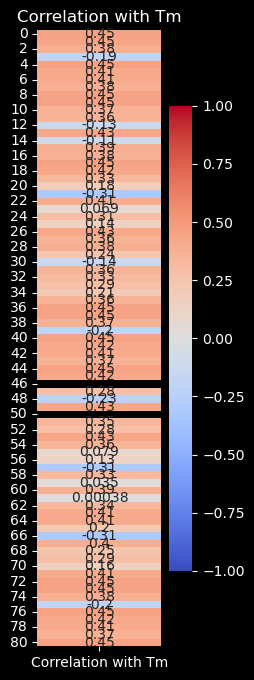

In [36]:
# correlation_matrix = df_desc.corr()
# tm_correlation = correlation_matrix[['Tm']]
plt.figure(figsize=(2, 8))
sns.heatmap(correlation_df[['Correlation with Tm']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Tm')
plt.savefig('corr_heatmap_of_DNA_score_desc_2.png')
plt.show()

In [35]:
correlation_results = {}

for col in df_desc.select_dtypes(include=['number']).columns:
    if 'Tm' in df.columns:
        correlation = df['Tm'].corr(df_desc[col])
        correlation_results[col] = correlation

# Convert the results to a DataFrame for easier visualization
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Property', 'Correlation with Tm'])
# correlation_df

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [33]:
import seaborn as sns


In [44]:
# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Draw the heatmap
# sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)

# # Display the heatmap
# plt.show()

In [37]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
def plot_predictions(model,x_test,y_test,correction=0,model_name="MLR",figure_name="actual_vs_predicted"):
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred-correction)
    mae = mean_absolute_error(y_test, y_pred-correction)
    r2 = r2_score(y_test, y_pred-correction)
    bias = np.mean(y_pred - y_test)

    # Calculate the slope/gradient
    # reg = LinearRegression().fit(y_test, (y_pred - correction))
    # slope = reg.coef_[0][0]

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred-correction, color='blue', label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Text box with metrics
    textstr = '\n'.join((
        f'R²: {r2:.2f}',
        f'Bias: {bias:.2f}',
        f'MAE: {mae:.2f}'
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    # plt.savefig(f'{figure_name}_{model_name}.png')
    plt.show()

In [39]:
df.columns[2:]

Index([], dtype='object')

In [40]:
df=df.dropna()
df
contains_zero = (df == 0).any().any()
if contains_zero:
    print("There are rows containing zero.")
else:
    print("There are no rows containing zero.")

    # Assuming df is your DataFrame
rows_with_zero = df[(df == 0).any(axis=1)]

rows_with_zero
df.to_csv('remove_zore_attemp_2.csv')
# df_lz
df

There are no rows containing zero.


,Tm,Avogadro_file_name
0,35.02,gagggaaagaaag.cml
1,31.89,gagggaaagaaag.cml
2,25.85,gagggaCagaaagctccctCtctttc.cml
3,64.14,tacaggtccatgggatctga.cml
4,49.23,gagggacagaaag.cml
...,...,...
97,18.57,99_aa_c-im_c-im.cml
98,25.47,100_xxx_6PP.cml
99,22.97,101_xxx_1D-6PP.cml
100,24.14,102_xxx_7D-6PP.cml


In [71]:
# df=pd.read_csv('check_for_0.csv')
df=pd.read_csv('check_for_0_fixed_2.csv')
df=df.drop(columns='Unnamed: 0')
df

,Tm,Avogadro_file_name,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,C_sugar-H_nucleobase,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,35.02,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
1,31.89,gagggaaagaaag.cml,680,45,981,454,359,50,688,746,...,1310,829,102,1270,564,484,79,879,1019,1135
2,25.85,gagggaCagaaagctccctCtctttc.cml,677,44,975,432,359,50,712,750,...,1280,834,102,1256,534,483,79,914,1021,1132
3,64.14,tacaggtccatgggatctga.cml,1122,74,1881,470,603,86,1639,1390,...,1916,1374,169,2466,588,795,135,2149,1865,1874
4,49.23,gagggacagaaag.cml,677,44,1014,433,359,50,759,768,...,1280,834,102,1312,539,483,79,973,1043,1132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,1059,70,2076,662,559,93,1460,1530,...,2202,1286,153,2712,849,735,142,1921,2088,1738
89,25.47,100_xxx_6PP.cml,221,5,736,310,107,23,451,602,...,1069,268,13,941,407,150,39,592,819,369
90,22.97,101_xxx_1D-6PP.cml,221,5,758,310,107,23,441,634,...,1072,267,13,972,407,150,39,580,860,368
91,24.14,102_xxx_7D-6PP.cml,221,5,753,310,107,23,446,626,...,1070,267,13,969,407,150,39,583,856,368


In [72]:
X2=df[df.columns[2:]]
y2=df['Tm']

In [73]:
X_train=df[df.columns[2:]]
y_train=df['Tm']

In [74]:
# Create the Linear Regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# plot_predictions(model,X_train,y_train,correction=0,model_name="MLR",figure_name="actual_vs_predicted")

In [75]:
# val_index_list

In [76]:
df_type

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH
0,35.02,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,6.8
1,31.89,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,9
2,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8
3,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8
4,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8
...,...,...,...,...,...,...
88,18.57,99_aa_c-im_c-im.cml,chemically_modified,aaaaaaaaaStaattttxaatattt,X = C-Im,6.8
89,25.47,100_xxx_6PP.cml,chemically_modified,gagggSSSgaaag,X = 6PP,6.8
90,22.97,101_xxx_1D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 1D_6PP,6.8
91,24.14,102_xxx_7D-6PP.cml,chemically_modified,gagggSSSgaaag,X = 7D_6PP,6.8


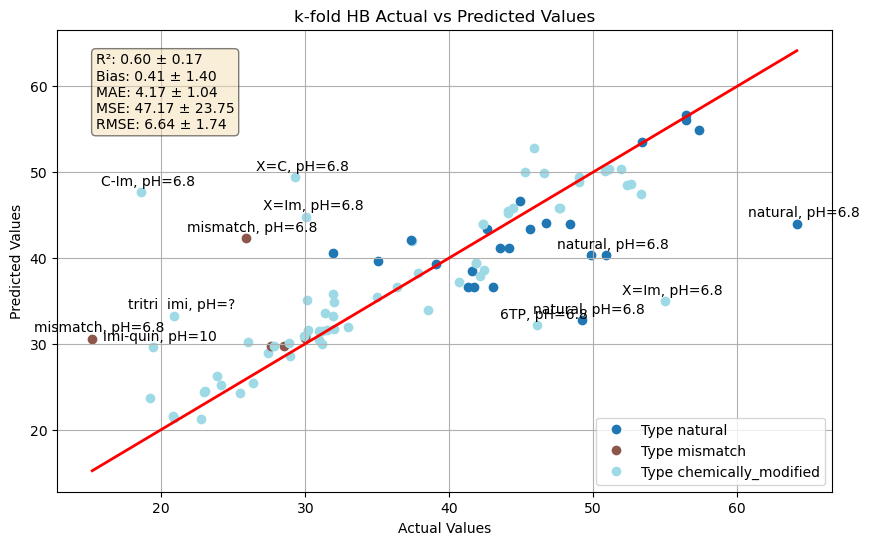

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


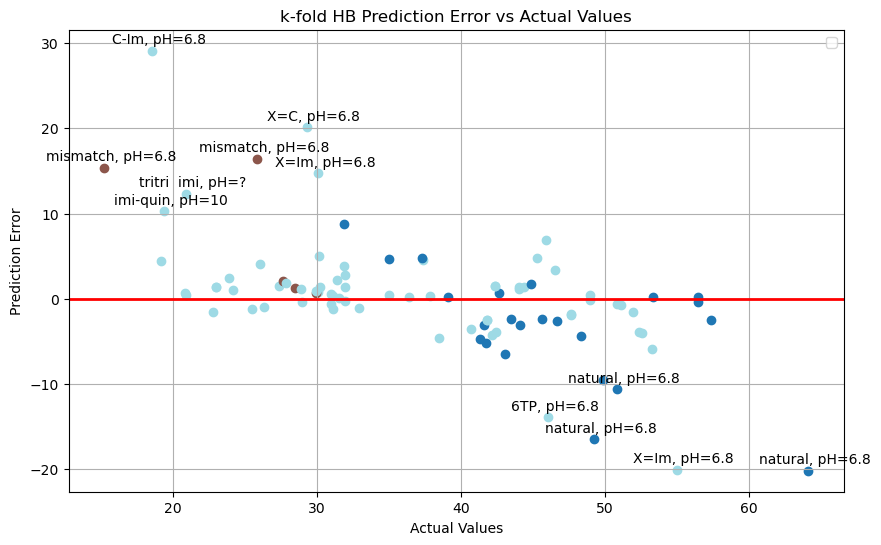

In [84]:
#  after 25th of August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_error_in_actual_value.png')
plt.show()

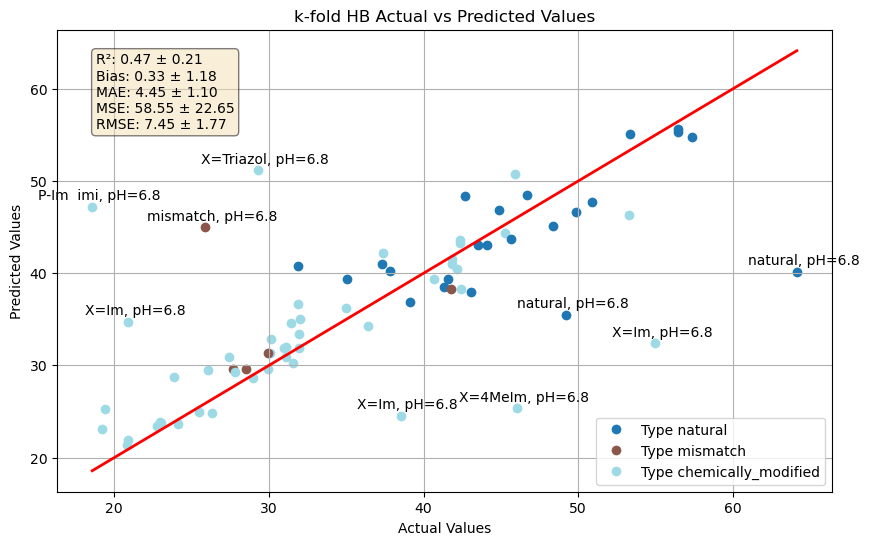

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


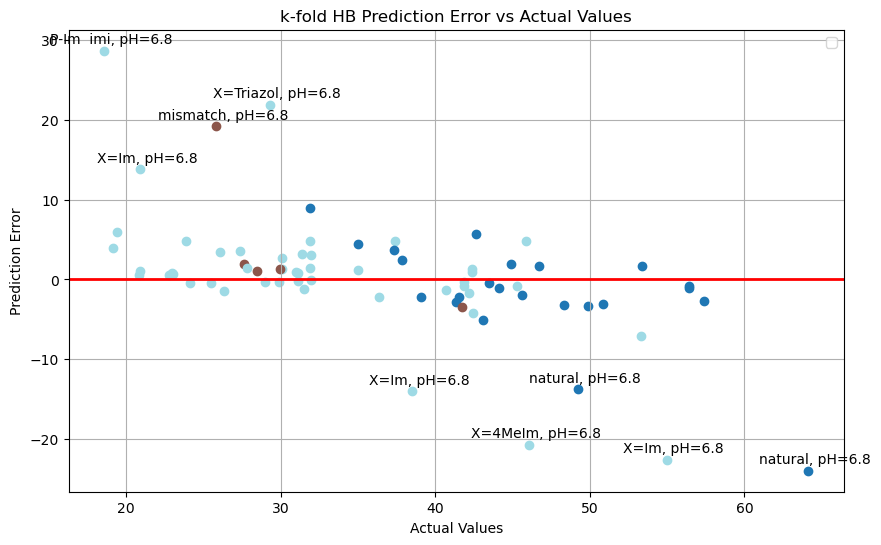

In [231]:
# before 25 August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_error_in_actual_value.png')
plt.show()

Bias: -0.11 vs -0.09 
MAE: 4.82 vs 4.81
R²: 0.37 vs 0.37


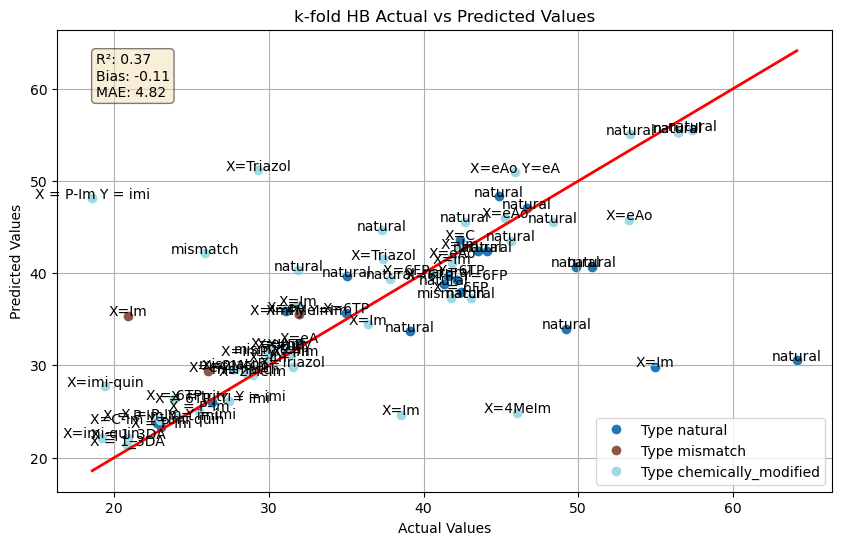

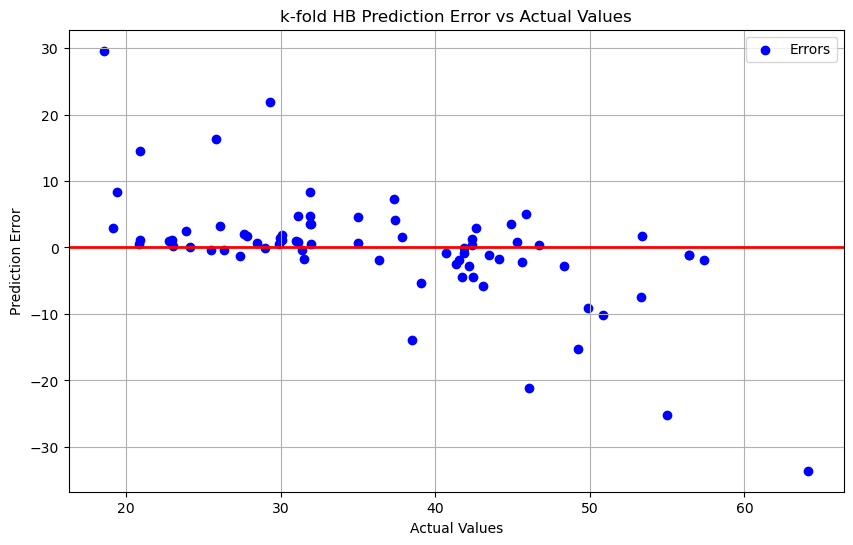

In [226]:
# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]

val_index_list=[]

for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    val_index_list.extend(val_index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
name_col='type' #'Consensuc sequence'
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))  # Choose a colormap, tab20 can handle up to 20 colors
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

# Plot actual vs predicted values with color-coding
plt.figure(figsize=(10, 6))

# Plot with color corresponding to the values in the 'column_name' column
for i, (actual, pred, color) in enumerate(zip(actuals, predictions, colors)):
    plt.scatter(actual, pred, color=color, label=f'Type {df_type[name_col].iloc[val_index_list[i]]}' if i == 0 else "")
    plt.annotate(f'{df_type["Nucleotide shorthand"].iloc[val_index_list[i]]}',  # Label with the type
                 (actual, pred),  # Position to place the label
                 textcoords="offset points",  # Use offset for positioning
                 xytext=(0,0),  # Slight offset to the right and up
                 ha='center')  # Horizontal alignment
# Create a custom legend to show all types
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')
# plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')


plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

In [80]:
for f in os.listdir(f'{directory_path}/Archie/'):
    print(f)

gacctagacaccattc.pdb
gcgcggac.pdb
gcggtgac.pdb
gcatggac.pdb
gatgccaggtcgataa.pdb
ctaccactaagccttg.pdb
acattattattaca.pdb
acgtattatgc.pdb
caaatcaaag.pdb
aatccagt.pdb
gcaaggac.pdb
ctcacgcc.pdb
gcatgc.pdb
cggacg.pdb
gcgacgac.pdb
tgctggac.pdb
gcgtcgac.pdb
cgctgttac.pdb
gcaccgac.pdb
gctgaatgtcctag.pdb
cacgactatctgaacc.pdb
ctatggac.pdb
ggctggac.pdb
gacttgtggacggtat.pdb
tagatcta.pdb
cggccg.pdb
acatatgt.pdb
ctaaggtcgtgtatcc.pdb
gctcagac.pdb
accgca.pdb
tcatggac.pdb
gaatattc.pdb
gccgggac.pdb
gccctgac.pdb
caatggac.pdb
aggtggac.pdb
taggccta.pdb
cgttggac.pdb
ggaacttgatgc.pdb
tgttgc.pdb
gctccgac.pdb
tactggac.pdb
gccagttaa.pdb
ccctggac.pdb
gagaccagagtgatc.pdb
gtacgtac.pdb
gacagtagctcggaat.pdb
gctaggac.pdb
tctatgca.pdb
caaagtaaag.pdb
caagcttg.pdb
ataactggc.pdb
caaaacaaag.pdb
tcgattaggacacagg.pdb
ttctggac.pdb
caaagaaaag.pdb
gcttggac.pdb
aagtggac.pdb
cgatggac.pdb
gtctggac.pdb
agttgc.pdb
cgcg.pdb
aaaaaaaa.pdb
cgctcaatgcctggag.pdb
cattggac.pdb
cttgtacttg.pdb
cacggctc.pdb
gtcgaaca.pdb
tcttggac.pdb
cgatgttc

In [81]:
f

'caaacaaaag.pdb'

In [82]:
from openbabel import openbabel

In [86]:
f='caaacaaaag.pdb'
file_path =f'{directory_path}/Archie/{f}'
output_file=f'test_{f}'
obConversion = openbabel.OBConversion()

out="pdb"

# Set the input format to CML and output format to PDB
obConversion.SetInAndOutFormats("pdb", f"{out}")

# Create an OBMol object to hold the molecule data
mol = openbabel.OBMol()

# Read the CML file
obConversion.ReadFile(mol, f"{file_path}")

if output_file is not None:
    # obConversion.WriteFile(mol, "output.pdb")
    obConversion.WriteFile(mol, f"{output_file}")

# Write the molecule data to a PDB file
content = obConversion.WriteString(mol)
content

"COMPND    /Users/ivanyankov/Documents/Chapter2/Notebooks/eval/Archie/caaacaaaag.pdb \nAUTHOR    GENERATED BY OPEN BABEL 3.1.0\nATOM      1 HO5' DC      1      -0.423  -8.150  -2.094  1.00  0.00           H  \nATOM      2  O5' DC      1       0.427  -7.826  -1.788  1.00  0.00           O  \nATOM      3  C5' DC      1       1.443  -7.510  -2.756  1.00  0.00           C  \nATOM      4  H5' DC      1       1.100  -6.745  -3.453  1.00  0.00           H  \nATOM      5 H5'' DC      1       1.674  -8.423  -3.305  1.00  0.00           H  \nATOM      6  C4' DC      1       2.695  -7.020  -2.053  1.00  0.00           C  \nATOM      7  H4' DC      1       3.574  -7.056  -2.696  1.00  0.00           H  \nATOM      8  O4' DC      1       2.477  -5.630  -1.823  1.00  0.00           O  \nATOM      9  C1' DC      1       2.308  -5.333  -0.452  1.00  0.00           C  \nATOM     10  H1' DC      1       3.112  -4.685  -0.102  1.00  0.00           H  \nATOM     11  N1  DC      1       1.098  -4.468  -0.3

In [143]:
df.to_csv('MH_for_merge.csv')

In [144]:
df

,Tm,Progres (y/n),Avogadro_file_name,Structure,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,37.85,y,30.cml,30.0,30_cm.cml,2436,675,4553,1273,1354,...,5177,3253,961,6168,1717,1890,617,4356,5177,4530
1,42.43,y,31.cml,31.0,31_cm.cml,2436,675,4549,1254,1354,...,5176,3253,961,6168,1692,1890,617,4352,5176,4530
2,40.68,y,32.cml,32.0,32_cm.cml,2436,675,4557,1254,1354,...,5173,3253,961,6165,1694,1890,617,4358,5173,4530
3,42.16,y,33.cml,33.0,33_cm.cml,2436,675,4545,1235,1354,...,5170,3253,961,6165,1667,1890,617,4348,5170,4530
4,35.01,y,34.cml,34.0,34_fo.cml,2436,675,4470,1235,1354,...,5136,3253,961,6045,1667,1890,617,4389,5136,4530
5,30.11,y,35_eA_c.cml,35.0,35_aA_c.cml,3163,862,4941,1218,1766,...,5519,4216,1242,6714,1633,2451,725,5108,5519,5833
6,31.98,y,36_eA_t.cml,36.0,36_eA_t.cml,3163,862,4973,1255,1766,...,5559,4218,1242,6762,1683,2451,725,5052,5559,5835
7,31.13,y,37_t_eA.cml,37.0,37_t_eA.cml,3169,863,4944,1260,1766,...,5507,4222,1241,6710,1677,2452,725,5086,5507,5835
8,26.05,y,39_Im_c.cml,39.0,39_Im_c.cml,3163,862,4808,1218,1766,...,5481,4216,1242,6517,1633,2451,725,4961,5481,5833
9,48.98,mt,40_t26_gxttg_X_X.cml,40.0,40_t26_gxttg_Im_Im_1.cml,2309,840,2783,1114,1330,...,3633,3191,1157,3913,1520,1846,618,1904,3633,4414


In [145]:
df.columns

Index(['Tm', 'Progres (y/n)', 'Avogadro_file_name', 'Structure',
       'CML_Filename', 'C_sugar-C_sugar', 'C_sugar-O_backbone',
       'C_sugar-C_nucleobase', 'C_sugar-O_nucleobase', 'C_sugar-O_sugar',
       'C_sugar-P_backbone', 'C_sugar-N_nucleobase', 'C_sugar-H_nucleobase',
       'C_sugar-H_sugar', 'O_backbone-C_sugar', 'O_backbone-O_backbone',
       'O_backbone-C_nucleobase', 'O_backbone-O_nucleobase',
       'O_backbone-O_sugar', 'O_backbone-P_backbone',
       'O_backbone-N_nucleobase', 'O_backbone-H_nucleobase',
       'O_backbone-H_sugar', 'C_nucleobase-C_sugar', 'C_nucleobase-O_backbone',
       'C_nucleobase-C_nucleobase', 'C_nucleobase-O_nucleobase',
       'C_nucleobase-O_sugar', 'C_nucleobase-P_backbone',
       'C_nucleobase-N_nucleobase', 'C_nucleobase-H_nucleobase',
       'C_nucleobase-H_sugar', 'O_nucleobase-C_sugar',
       'O_nucleobase-O_backbone', 'O_nucleobase-C_nucleobase',
       'O_nucleobase-O_nucleobase', 'O_nucleobase-O_sugar',
       'O_nucleobase-P_ba

In [79]:
df_lz = pd.read_csv('Lomzov_for_merging.csv')
df_lz

,Unnamed: 0,Tm,DNA,CML_Filename,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,0,16.9,aaaaaaaa,aaaaaaaa.pdb,2424,628,3172,690,1458,354,...,3483,3432,912,4359,942,1992,518,3220,3483,4642
1,1,27.9,aaaaaaaaa,aaaaaaaaa.pdb,2810,732,3656,795,1690,414,...,4005,3966,1062,5018,1083,2302,606,3704,4005,5352
2,2,32.0,aaaaaaaaaa,aaaaaaaaaa.pdb,3196,836,4140,900,1922,474,...,4527,4500,1212,5677,1224,2612,694,4188,4527,6062
3,3,35.7,aactggac,aactggac.pdb,2424,628,3068,699,1458,354,...,3438,3432,912,4205,966,1992,518,3461,3438,4642
4,4,37.0,aagcgtag,aagcgtag.pdb,2424,628,3065,696,1458,354,...,3447,3432,912,4207,969,1992,518,3458,3447,4642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,300,28.7,ttcattcc,ttcattcc.pdb,2424,628,3093,688,1458,354,...,3444,3432,912,4245,946,1992,518,3389,3444,4642
301,301,32.9,ttctggac,ttctggac.pdb,2424,628,3044,676,1458,354,...,3374,3432,912,4171,928,1992,518,3495,3374,4642
302,302,69.2,ttgaagatacgctggc,ttgaagatacgctggc.pdb,5512,1460,6802,1522,3314,834,...,7524,7704,2112,9276,2087,4472,1222,7616,7524,10322
303,303,35.8,ttgtggac,ttgtggac.pdb,2424,628,3045,677,1458,354,...,3390,3432,912,4176,932,1992,518,3488,3390,4642


In [80]:
# Drop columns containing 'H' in their names for both DataFrames
df_lz = df_lz.loc[:, ~df_lz.columns.str.contains('H')]
df = df.loc[:, ~df.columns.str.contains('H')]
# Get the intersection of columns between the two DataFrames
common_columns = df_lz.columns.intersection(df.columns)

# Reorder the columns in both DataFrames to ensure the same order
df_lz = df_lz[common_columns]
df = df[common_columns]


In [81]:
# df
df_lz

,Tm,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,O_backbone-C_sugar,O_backbone-O_backbone,...,P_backbone-O_sugar,P_backbone-P_backbone,P_backbone-N_nucleobase,N_nucleobase-C_sugar,N_nucleobase-O_backbone,N_nucleobase-C_nucleobase,N_nucleobase-O_nucleobase,N_nucleobase-O_sugar,N_nucleobase-P_backbone,N_nucleobase-N_nucleobase
0,16.9,2424,628,3172,690,1458,354,2334,628,160,...,222,46,336,2334,546,2945,591,1339,336,2076
1,27.9,2810,732,3656,795,1690,414,2690,732,186,...,260,54,390,2690,632,3408,684,1543,390,2403
2,32.0,3196,836,4140,900,1922,474,3046,836,212,...,298,62,444,3046,718,3871,777,1747,444,2730
3,35.7,2424,628,3068,699,1458,354,2507,628,160,...,222,46,358,2507,594,2986,642,1425,358,2404
4,37.0,2424,628,3065,696,1458,354,2511,628,160,...,222,46,360,2511,598,2992,643,1434,360,2404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,2424,628,3093,688,1458,354,2460,628,160,...,222,46,350,2460,579,2974,623,1403,350,2285
301,32.9,2424,628,3044,676,1458,354,2535,628,160,...,222,46,358,2535,602,2983,641,1443,358,2410
302,69.2,5512,1460,6802,1522,3314,834,5575,1460,368,...,526,110,817,5575,1348,6730,1439,3175,817,5386
303,35.8,2424,628,3045,677,1458,354,2532,628,160,...,222,46,358,2532,601,2985,640,1442,358,2406


In [150]:
test= Molecule('41_t26_gxttg_Triazol_Triazol_1.cml',mapping=filtered_label_mapping)
test.unique_atom_labels


{('C_sugar', 'C_sugar'): 0,
 ('C_sugar', 'O_backbone'): 0,
 ('C_sugar', 'C_nucleobase'): 0,
 ('C_sugar', 'O_nucleobase'): 0,
 ('C_sugar', 'O_sugar'): 0,
 ('C_sugar', 'P_backbone'): 0,
 ('C_sugar', 'N_nucleobase'): 0,
 ('C_sugar', 'H_nucleobase'): 0,
 ('C_sugar', 'H_sugar'): 0,
 ('O_backbone', 'C_sugar'): 0,
 ('O_backbone', 'O_backbone'): 0,
 ('O_backbone', 'C_nucleobase'): 0,
 ('O_backbone', 'O_nucleobase'): 0,
 ('O_backbone', 'O_sugar'): 0,
 ('O_backbone', 'P_backbone'): 0,
 ('O_backbone', 'N_nucleobase'): 0,
 ('O_backbone', 'H_nucleobase'): 0,
 ('O_backbone', 'H_sugar'): 0,
 ('C_nucleobase', 'C_sugar'): 0,
 ('C_nucleobase', 'O_backbone'): 0,
 ('C_nucleobase', 'C_nucleobase'): 0,
 ('C_nucleobase', 'O_nucleobase'): 0,
 ('C_nucleobase', 'O_sugar'): 0,
 ('C_nucleobase', 'P_backbone'): 0,
 ('C_nucleobase', 'N_nucleobase'): 0,
 ('C_nucleobase', 'H_nucleobase'): 0,
 ('C_nucleobase', 'H_sugar'): 0,
 ('O_nucleobase', 'C_sugar'): 0,
 ('O_nucleobase', 'O_backbone'): 0,
 ('O_nucleobase', 'C_nucl

Weight: 1.0, Avg. MAE: 8.433962737944926, Avg. MAE1: 0.914604649687746
Weight: 56.44444444444444, Avg. MAE: 8.139299640197764, Avg. MAE1: 0.8892467017954735
Weight: 111.88888888888889, Avg. MAE: 8.263692398552628, Avg. MAE1: 0.9073542642466832
Weight: 167.33333333333331, Avg. MAE: 8.292193024030894, Avg. MAE1: 0.8942056928181119
Weight: 222.77777777777777, Avg. MAE: 8.556431016605451, Avg. MAE1: 0.8916388210382532
Weight: 278.22222222222223, Avg. MAE: 8.014473752678299, Avg. MAE1: 0.9098918918813442
Weight: 333.66666666666663, Avg. MAE: 8.219314082491584, Avg. MAE1: 0.9024206635441079
Weight: 389.1111111111111, Avg. MAE: 8.068341244588744, Avg. MAE1: 0.8952714178376284
Weight: 444.55555555555554, Avg. MAE: 8.2515795235089, Avg. MAE1: 0.9083804234972692
Weight: 500.0, Avg. MAE: 8.36442732767338, Avg. MAE1: 0.8922405103434843
Best weight: 500.0, Best Avg. MSE: 8.36442732767338,
Train: 22 Test: 66 out of 88


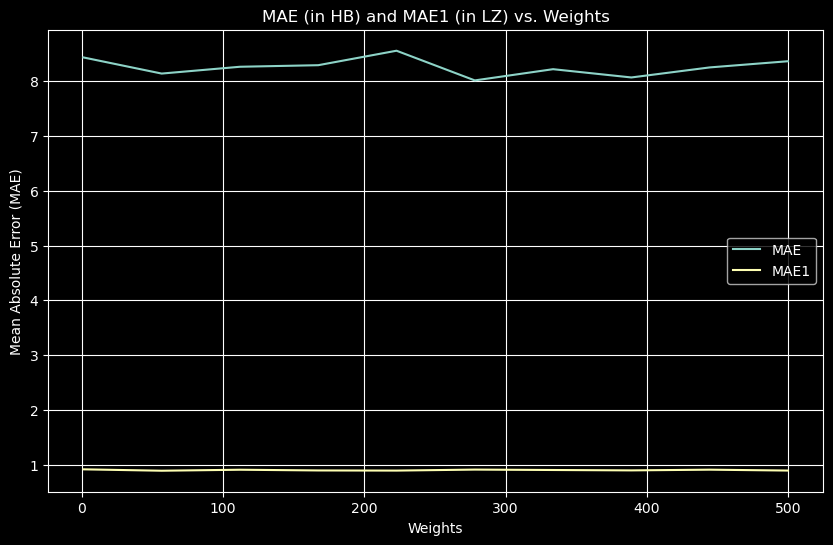

In [62]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Weight: 1.0, Avg. MAE: 5.165506802440462, Avg. MAE1: 0.9032452905932884
Weight: 56.44444444444444, Avg. MAE: 5.095316647790848, Avg. MAE1: 0.8999387724434058
Weight: 111.88888888888889, Avg. MAE: 4.974722190520863, Avg. MAE1: 0.9049855796252942
Weight: 167.33333333333331, Avg. MAE: 5.123296146734358, Avg. MAE1: 0.9106767117486352
Weight: 222.77777777777777, Avg. MAE: 5.126945793273903, Avg. MAE1: 0.8991669613583158
Weight: 278.22222222222223, Avg. MAE: 5.034812236851941, Avg. MAE1: 0.8976515124902439
Weight: 333.66666666666663, Avg. MAE: 5.259009941251838, Avg. MAE1: 0.8918355255659655
Weight: 389.1111111111111, Avg. MAE: 5.157457138156131, Avg. MAE1: 0.9088858981264654
Weight: 444.55555555555554, Avg. MAE: 5.241576060141803, Avg. MAE1: 0.8947337771272459
Weight: 500.0, Avg. MAE: 5.138421153306599, Avg. MAE1: 0.916214010798857
Best weight: 500.0, Best Avg. MSE: 5.138421153306599,
Train: 66 Test: 22 out of 88


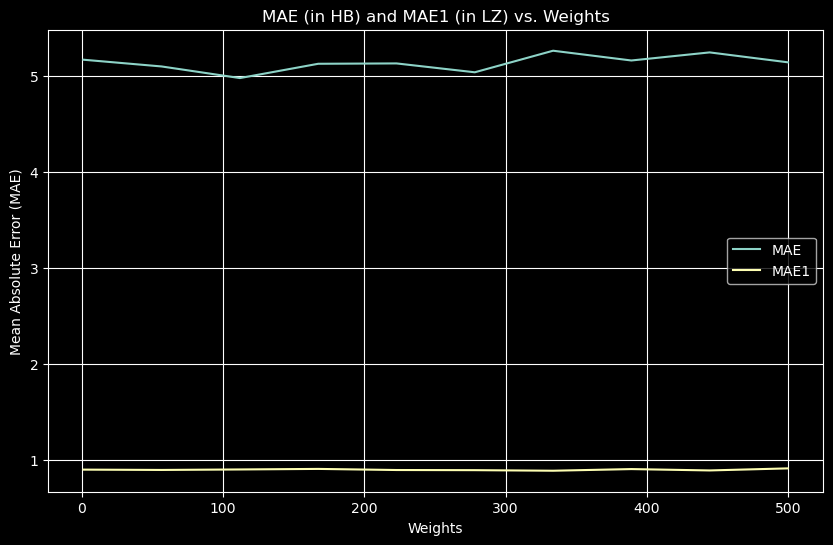

In [63]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y_val = y2.iloc[train_index], y2.iloc[val_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Bias: -0.42 vs -0.40 
MAE: 4.93 vs 4.91
R²: 0.43 vs 0.35


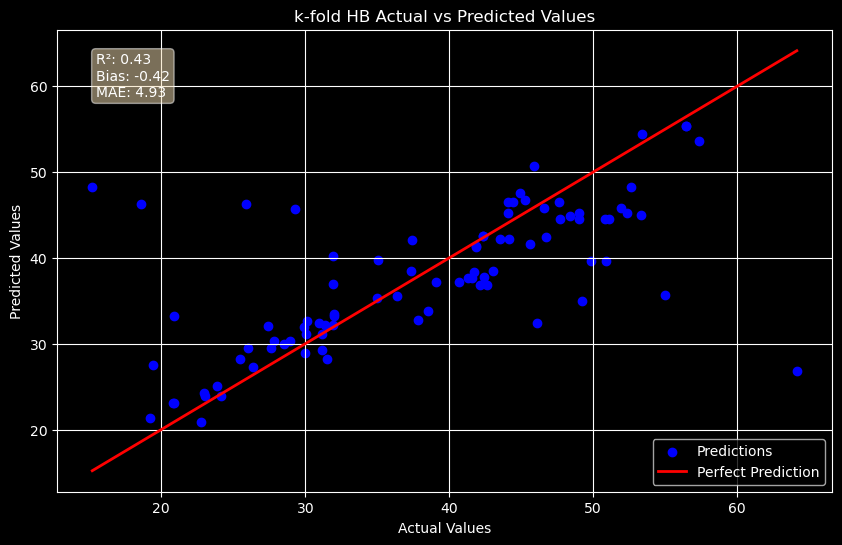

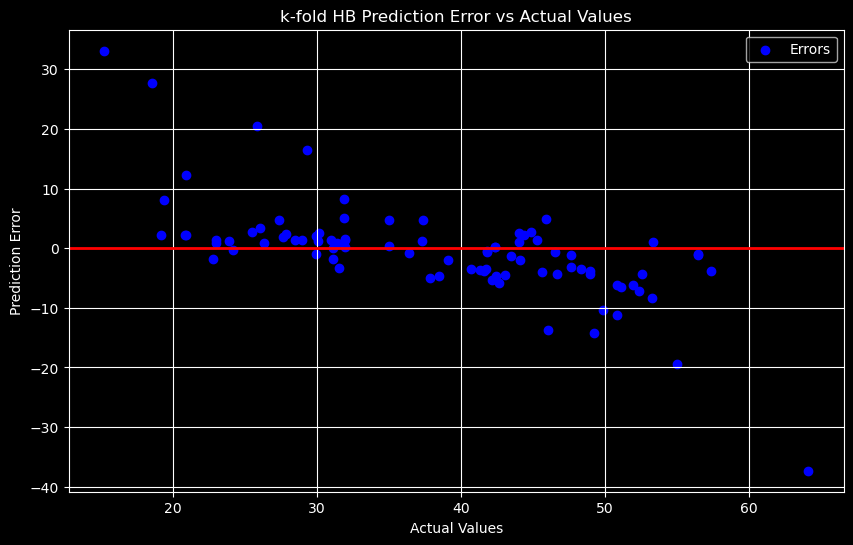

In [65]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()

    # Apply weights
    weights = np.ones(len(y_train))
    weights[len(y1):] *= weight
    model.fit(X_train, y_train,sample_weight=weights)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

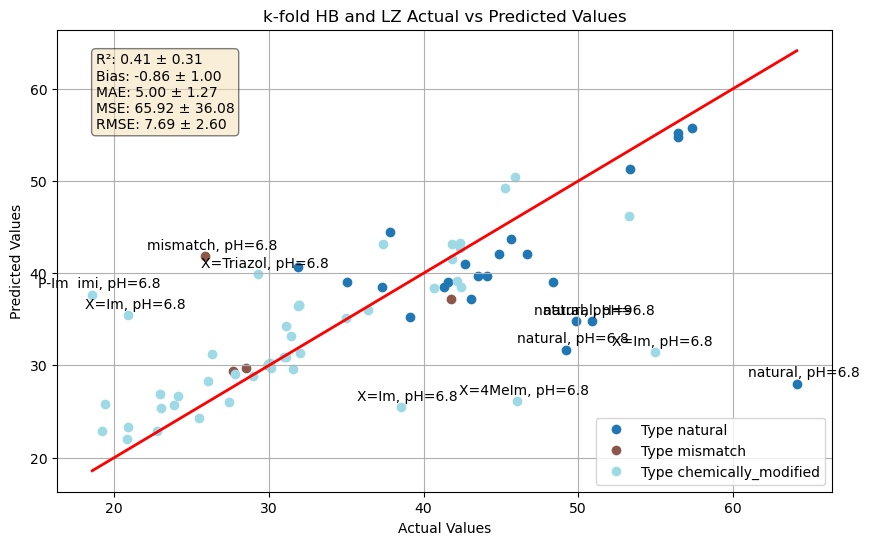

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


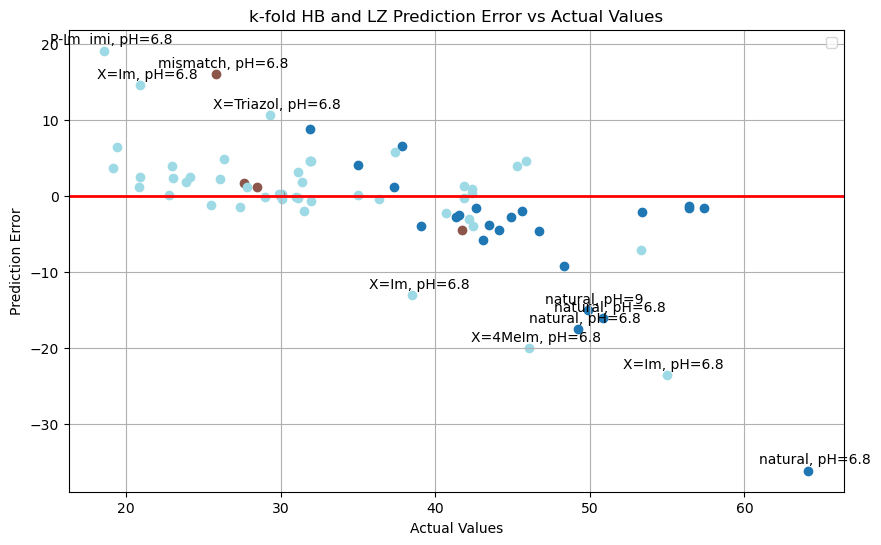

In [227]:
# Before 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

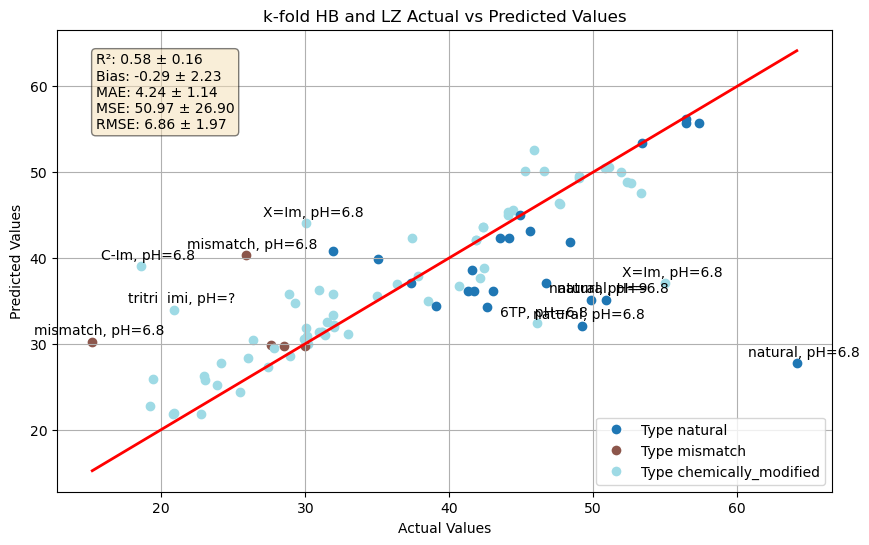

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


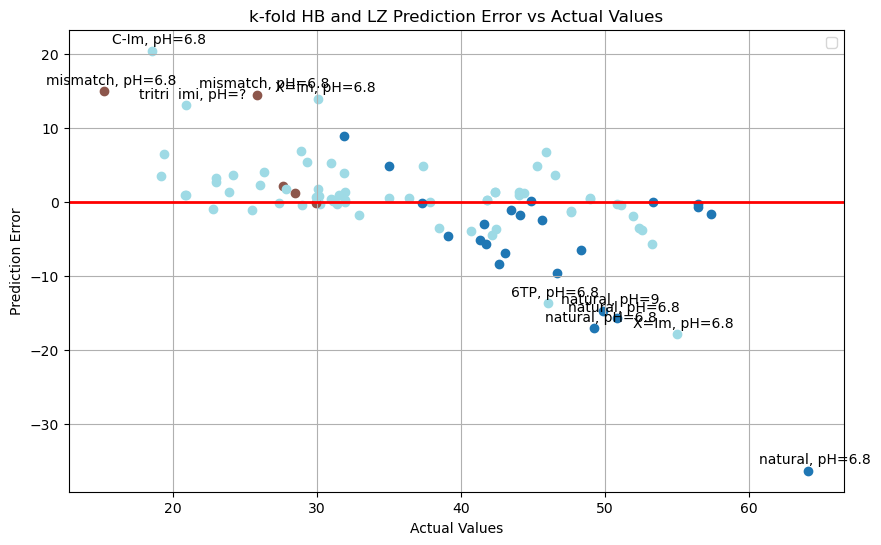

In [83]:
# after 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

# Just a CV with both datasets

Bias: 0.09 vs 0.09 
MAE: 2.96 vs 2.96
R²: 0.84 vs 0.84


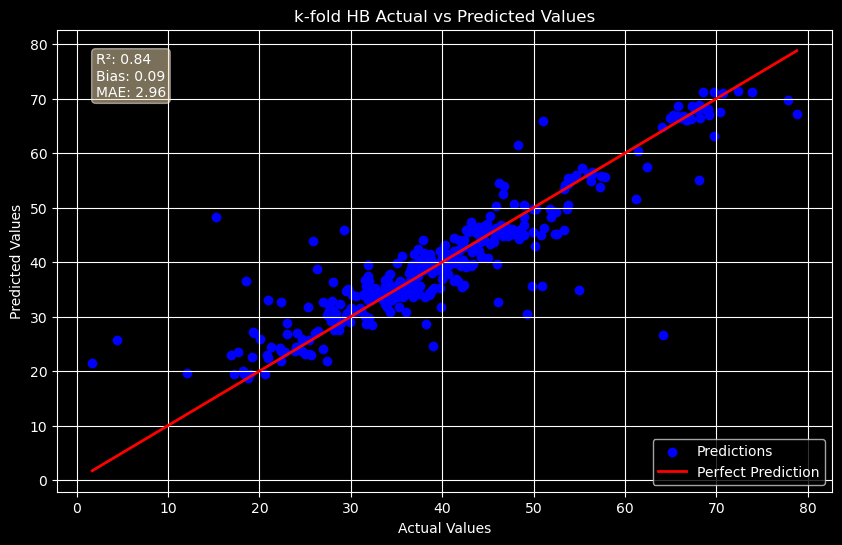

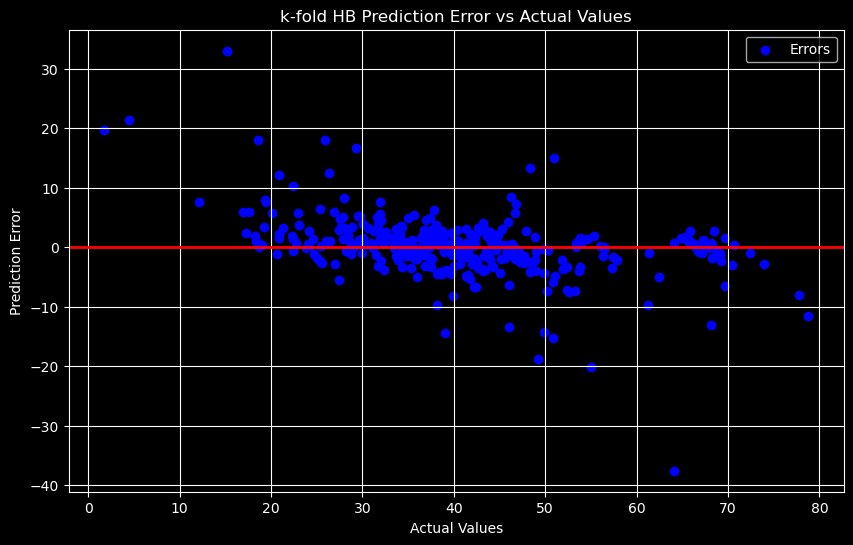

In [70]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']


X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()

    # Apply weights
    # weights = np.ones(len(y_train))
    # weights[len(y1):] *= weight
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

In [191]:
df_lz
df
df_all=pd.concat((df, df_lz), axis=0)
df_all=df_all.reset_index(drop=True)

,Tm,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,O_backbone-C_sugar,O_backbone-O_backbone,...,P_backbone-O_sugar,P_backbone-P_backbone,P_backbone-N_nucleobase,N_nucleobase-C_sugar,N_nucleobase-O_backbone,N_nucleobase-C_nucleobase,N_nucleobase-O_nucleobase,N_nucleobase-O_sugar,N_nucleobase-P_backbone,N_nucleobase-N_nucleobase
0,35.02,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
1,31.89,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
2,25.85,677,44,975,432,359,50,712,44,4,...,29,0,57,1323,257,1622,528,675,136,919
3,64.14,1122,74,1881,470,603,86,1639,72,7,...,50,0,152,1720,291,2245,460,870,163,1732
4,49.23,677,44,1014,433,359,50,759,44,4,...,29,0,62,1323,257,1659,529,675,136,983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.57,1059,70,2076,662,559,93,1460,68,7,...,53,0,145,1715,281,3090,975,867,190,1646
84,25.47,221,5,736,310,107,23,451,5,0,...,14,0,92,782,157,2739,855,402,152,1385
85,22.97,221,5,758,310,107,23,441,5,0,...,14,0,68,776,162,2432,684,395,126,1136
86,24.14,221,5,753,310,107,23,446,5,0,...,14,0,77,780,163,2439,694,399,133,1128


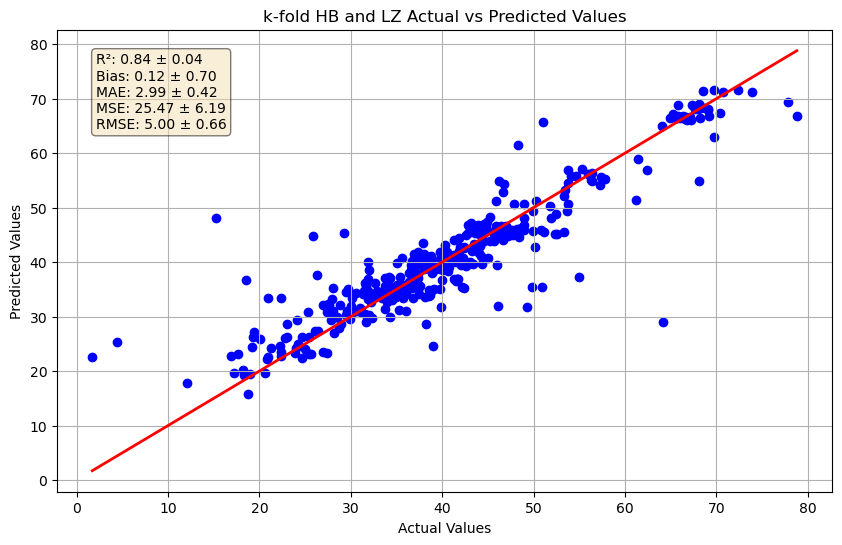

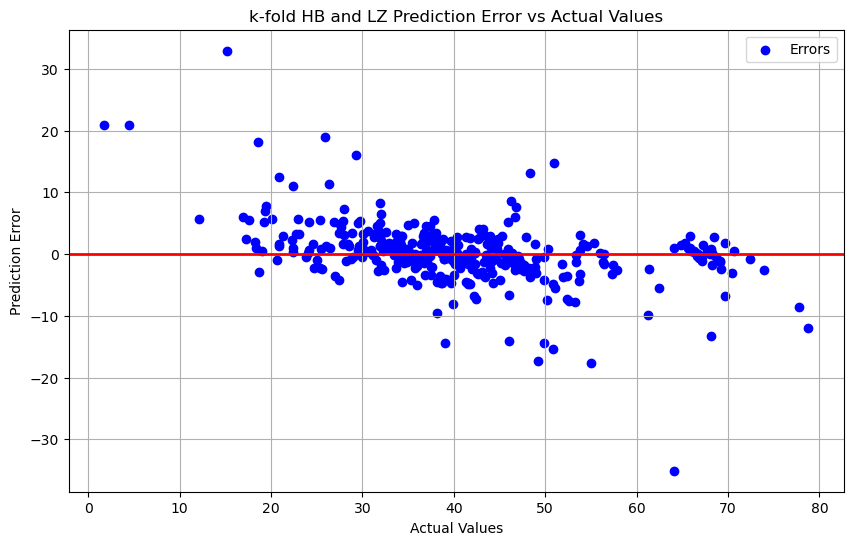

In [194]:
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']

X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_all[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# # Scatter plot with colors and annotations
# for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, pred, color=color)
#      # Check if the absolute difference is greater than 15
#     if abs(actual - pred) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, pred), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')

# Perfect prediction line
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_CV-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

# for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, error, color=color)
#      # Check if the absolute difference is greater than 15
#     if np.abs(error) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, error), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')


plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_CV-fold_HB_LZ_error_in_actual_value.png')
plt.show()

In [72]:
df['Tm']

0     35.02
1     31.89
2     25.85
3     64.14
4     49.23
      ...  
83    18.57
84    25.47
85    22.97
86    24.14
87    23.02
Name: Tm, Length: 88, dtype: float64